# **Análise de Dados de Vinhos no Brasil de 2010 a 2024**🍷                    

Este trabalho integra o Tech Challenge da Pós-Tech em Data Analytics da FIAP e corresponde à avaliação da etapa inicial da pós-graduação. A equipe responsável pelo desenvolvimento é formada por:



*   Carolyne Rafaella Soares Costa
*   Juliana Gomes Maciel
*   Natalia Alexandra Leite Trippo
*   Natane Cezario Barbosa
*   Tainara Covas Nogueira

## **1. Contextualização**

A capacidade de antecipar cenários futuros e de compreender de forma aprofundada os dados já coletados é essencial para empresas que produzem e exportam vinhos. Oscilações inesperadas no mercado internacional podem ocasionar queda de participação ou até prejuízos consideráveis. Por isso, aplicar técnicas de análise de dados – tanto das bases internas da própria empresa quanto dos indicadores globais – representa uma vantagem estratégica, permitindo respostas mais rápidas e fundamentadas às alterações do setor.

O objetivo deste estudo é examinar o volume de exportações de vinhos brasileiros ao longo dos últimos quinze anos. Para isso, empregamos Python e a biblioteca Pandas nas etapas de extração, limpeza e preparação dos dados; Matplotlib e Seaborn para geração de gráficos; além do Power BI para construção de relatórios complementares. Com base nos insights obtidos, apresentamos recomendações de ações que possam potencializar o desempenho das exportações.

## **2. Compreensão do Negócio**


Em um mercado vinícola cada vez mais globalizado e competitivo, é essencial conhecer em profundidade os mecanismos que regem as exportações para embasar decisões estratégicas. A análise dos padrões de demanda e das variações sazonais permite ajustar o planejamento de produção, definir preços adequados e direcionar esforços de marketing aos destinos mais promissores.

Além disso, a visibilidade conquistada por [rótulos nacionais](https://https://cnm.org.br/comunicacao/noticias/vinho-brasileiro-se-destaca-em-uma-das-maiores-premiacoes-do-mundo) em competições internacionais confere ao vinho brasileiro um selo de qualidade reconhecido mundialmente. Esse prestígio fortalece a reputação das marcas, amplia o apetite de importadores exigentes e potencializa o poder de negociação junto aos distribuidores. Consequentemente, premiar padrões elevados de produção torna-se um diferencial competitivo que apoia políticas de incentivo à exportação e eleva o valor agregado do produto.

Assim, realizamos uma exploração abrangente dos dados de exportação, importação, produção e comercialização de vinhos, identificando padrões de consumo e variações sazonais; em seguida, mapeamos as tendências de longo prazo e as sazonalidades regionais que moldam o comportamento do mercado; por fim, comparamos o desempenho brasileiro com o panorama global da indústria vinícola, avaliando nossa posição competitiva e evidenciando oportunidades de crescimento.


**Principais Indicadores de Desempenho (KPIs)**

- **Volume exportado (litros):** mensura a quantidade total enviada para o exterior  
- **Receita de exportação (US\$):** avalia o retorno financeiro bruto  
- **Preço médio de exportação (US\$/L):** auxilia no entendimento da percepção de valor por mercado  
- **Volume importado (litros) e Receita de importação (US\$):** suportam análises de competição interna  
- **Preço médio de importação (US\$/L):** indica níveis de competitividade de preço  
- **Volume de produção (litros) e Volume comercializado (litros):** fornecem panorama do ciclo produtivo e da absorção interna.

Com esse conjunto de análises e métricas, as empresas ganham subsídios robustos para otimizar operações, explorar novas frentes de mercado e reduzir riscos associados a flutuações econômicas e de consumo.

## **3. Importando as bibliotecas e os Datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import requests
from sklearn.preprocessing import MinMaxScaler

import warnings

# Desabilitar todos os warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importando a base de dados de Exportação
exportacao = pd.read_csv("/content/Exportacao - Vinho de Mesa.csv", delimiter='\t', encoding='utf-8')

In [ ]:
# Importando a base de dados de Importação
importacao = pd.read_csv("/content/Importacao - Vinhos de Mesa.csv", delimiter='\t', encoding='utf-8')

In [ ]:
# importando a base de dados de produção
producao = pd.read_csv("/content/Producao.csv", encoding="UTF-8-SIG",sep=";",thousands=".",decimal=",")


In [ ]:
# importando a base de dados de comercio
comercio = pd.read_csv('/content/Comercializacao.csv', encoding="UTF-8-SIG",sep=";",thousands=".",decimal=",")


In [ ]:
# Importando a base de dados de mercado global de vinhos
mercado = pd.read_excel('/content/OIV_database.xlsx')

## **4. Tratamendo e Limpeza dos dados**

### **4.1 Quanto à Exportação:**



In [ ]:
# Visualizando as primeiras linhas
exportacao.head()


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
exportacao['País'].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha, República Democrática',
       'Angola', 'Anguilla', 'Antígua e Barbuda', 'Antilhas Holandesas',
       'Arábia Saudita', 'Argélia', 'Argentina', 'Aruba', 'Austrália',
       'Áustria', 'Bahamas', 'Bangladesh', 'Barbados', 'Barein',
       'Bélgica', 'Belice', 'Benin', 'Bermudas', 'Bolívia',
       'Bósnia-Herzegovina', 'Brasil', 'Bulgária', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Cocos (Keeling), Ilhas', 'Colômbia',
       'Comores', 'Congo', 'Coreia, Republica Sul', 'Costa do Marfim',
       'Costa Rica', 'Coveite (Kuweit)', 'Croácia', 'Cuba', 'Curaçao',
       'Dinamarca', 'Dominica', 'El Salvador', 'Emirados Arabes Unidos',
       'Equador', 'Eslovaca, Republica', 'Espanha', 'Estados Unidos',
       'Estônia', 'Filipinas', 'Finlândia', 'França', 'Gabão', 'Gana',
       'Gibraltar', 'Granada', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guin

Percebe-se que alguns nomes de países estão despadronizados, apresentando vírgula para separar partes do nome, como `Eslovaca, República`. Para manter a consistência e melhorar a apresentação dos dados, estou invertendo esses nomes, colocando a parte após a vírgula na frente, resultando em `República Eslovaca`.

In [ ]:
def inverter_nome(pais):
    if ',' in pais:
        partes = pais.split(',')
        return partes[1].strip() + ' ' + partes[0].strip()
    return pais

exportacao['País'] = exportacao['País'].apply(inverter_nome)

In [ ]:
exportacao['País'].unique()

array(['Afeganistão', 'África do Sul', 'República Democrática Alemanha',
       'Angola', 'Anguilla', 'Antígua e Barbuda', 'Antilhas Holandesas',
       'Arábia Saudita', 'Argélia', 'Argentina', 'Aruba', 'Austrália',
       'Áustria', 'Bahamas', 'Bangladesh', 'Barbados', 'Barein',
       'Bélgica', 'Belice', 'Benin', 'Bermudas', 'Bolívia',
       'Bósnia-Herzegovina', 'Brasil', 'Bulgária', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Ilhas Cayman', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Ilhas Cocos (Keeling)', 'Colômbia',
       'Comores', 'Congo', 'Republica Sul Coreia', 'Costa do Marfim',
       'Costa Rica', 'Coveite (Kuweit)', 'Croácia', 'Cuba', 'Curaçao',
       'Dinamarca', 'Dominica', 'El Salvador', 'Emirados Arabes Unidos',
       'Equador', 'Republica Eslovaca', 'Espanha', 'Estados Unidos',
       'Estônia', 'Filipinas', 'Finlândia', 'França', 'Gabão', 'Gana',
       'Gibraltar', 'Granada', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guine Bis

In [ ]:
# Separando as colunas de quantidade (litros) e valor (US$)
quant_cols = [col for col in exportacao.columns if not col.endswith('.1') and col not in ['Id', 'País']]
valor_cols = [col for col in exportacao.columns if col.endswith('.1')]

In [ ]:
#Criando DataFrames separados para Litros e Valor exportados
exportacao_qtd = exportacao[['País'] + quant_cols].copy()
exportacao_val = exportacao[['País'] + valor_cols].copy()

In [ ]:
# Renomeando as colunas de valor para coincidir com anos (sem .1)
exportacao_val.columns = ['País'] + [col.replace('.1', '') for col in valor_cols]

In [ ]:
exportacao_qtd.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,4,0,0,117,103
2,República Democrática Alemanha,0,0,4168,12000,0,0,0,0,0,...,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
3,Angola,0,0,0,0,0,0,0,0,0,...,1908,7359,10170,477,345,0,0,4068,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
exportacao_val.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,95,21,0,0,698,1783
2,República Democrática Alemanha,0,0,2630,8250,0,0,0,0,0,...,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,0,0,0,0,0,0,0,0,0,...,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Transformando os DataFrames para formato longo (melt)
exportacao_qtd_long = exportacao_qtd.melt(id_vars='País', var_name='Ano', value_name='Litros')
exportacao_val_long = exportacao_val.melt(id_vars='País', var_name='Ano', value_name='Valor_USD')

In [ ]:
exportacao_qtd_long.head()

,País,Ano,Litros
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,República Democrática Alemanha,1970,0
3,Angola,1970,0
4,Anguilla,1970,0


In [ ]:
exportacao_val_long.head()

,País,Ano,Valor_USD
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,República Democrática Alemanha,1970,0
3,Angola,1970,0
4,Anguilla,1970,0


In [ ]:
# Unindo os dois DataFrames pelo país e ano
exportacao_long = pd.merge(exportacao_qtd_long, exportacao_val_long, on=['País', 'Ano'])

In [ ]:
exportacao_long.head()

,País,Ano,Litros,Valor_USD
0,Afeganistão,1970,0,0
1,África do Sul,1970,0,0
2,República Democrática Alemanha,1970,0,0
3,Angola,1970,0,0
4,Anguilla,1970,0,0


In [ ]:
# Verificando se há valores nulos

exportacao_long.isnull().sum()

,0
País,0
Ano,0
Litros,0
Valor_USD,0


Nenhuma das colunas apresentam valores nulos.

In [ ]:
exportacao_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   País       7755 non-null   object
 1   Ano        7755 non-null   object
 2   Litros     7755 non-null   int64 
 3   Valor_USD  7755 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 242.5+ KB


In [ ]:
# Convertendo ano para inteiro
exportacao_long['Ano'] = exportacao_long['Ano'].astype(int)

#  Filtrando últimos 15 anos
ultimo_ano = exportacao_long['Ano'].max()
exportacao_long = exportacao_long[exportacao_long['Ano'] >= (ultimo_ano - 14)]

In [ ]:
exportacao_long.head() # Exportacao entre os anos de 2010 e 2024.

,País,Ano,Litros,Valor_USD
5640,Afeganistão,2010,0,0
5641,África do Sul,2010,0,0
5642,República Democrática Alemanha,2010,27715,138666
5643,Angola,2010,33557,189891
5644,Anguilla,2010,0,0


O head de dados pediu uma tabela contendo as seguintes informações:

a. País de Origem

b.País de destino

c. Quantidade em litros de vinho exportado

d. Valor em US\$

Entao, vamos reorganizar e renomear nosso Dataframe para atender essa solicitação.

In [ ]:
# Renomeando as colunas e adicionando coluna de origem
exportacao_tratada = (
    exportacao_long
    .rename(columns={
        'País': 'País de destino',
        'Litros': 'Quantidade (litros)',
        'Valor_USD': 'Valor (US$)'
    })
    .assign(**{'País de origem': 'Brasil'})
)

# Reordenando as colunas
exportacao_tratada = exportacao_tratada[
    ['País de origem', 'País de destino','Ano', 'Quantidade (litros)', 'Valor (US$)']
]


# Visualizando as primeiras linhas da nossa tabela
exportacao_tratada.head()

,País de origem,País de destino,Ano,Quantidade (litros),Valor (US$)
5640,Brasil,Afeganistão,2010,0,0
5641,Brasil,África do Sul,2010,0,0
5642,Brasil,República Democrática Alemanha,2010,27715,138666
5643,Brasil,Angola,2010,33557,189891
5644,Brasil,Anguilla,2010,0,0


In [ ]:
# Agrupando por origem e destino, somando a quantidade e o valor em todos os anos
exportacao_agregada = (
    exportacao_tratada
      .groupby(
          ['País de origem','País de destino'],
          as_index=False
       )[['Quantidade (litros)','Valor (US$)']].sum()
)

# Exibindo as primeiras linhas
exportacao_agregada.head()


,País de origem,País de destino,Quantidade (litros),Valor (US$)
0,Brasil,Afeganistão,11,46
1,Brasil,Angola,88361,420871
2,Brasil,Anguilla,0,0
3,Brasil,Antilhas Holandesas,70829,109356
4,Brasil,Antígua e Barbuda,2934,12915


In [ ]:
# Exportando o arquivo de Exportação de vinho já tratado.
exportacao_agregada.to_excel("exportacao_vinho_tratado.xlsx", index=False)

### **4.2 Quanto à Importação:**

In [ ]:
# Visualizando as primeiras linhas
importacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,627150,1701072,859169,2508140,738116,2266827,522733,1732850,658238,2133775
1,2,Alemanha,52297,30498,34606,26027,134438,92103,111523,98638,...,136992,504168,106541,546967,92600,438595,102456,557947,121002,805466
2,3,Argélia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0,0,0,0,0,0,0,...,0,0,2510,8761,0,0,8,161,0,0
4,5,Argentina,19525,12260,24942,15022,104906,58137,116887,76121,...,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138,26272478,93869579


In [ ]:
# Ajustando nome dos países
def inverter_nome(pais):
    if ',' in pais:
        partes = pais.split(',')
        return partes[1].strip() + ' ' + partes[0].strip()
    return pais

importacao['País'] = importacao['País'].apply(inverter_nome)

In [ ]:
importacao['País'].unique()

array(['Africa do Sul', 'Alemanha', 'Argélia', 'Arábia Saudita',
       'Argentina', 'Armênia', 'Austrália', 'Áustria', 'Bermudas',
       'Bélgica', 'Bolívia', 'Bósnia-Herzegovina', 'Brasil', 'Bulgária',
       'Canada', 'Chile', 'China', 'República Coreia do Sul', 'Croácia',
       'Cuba', 'Emirados Árabes Unidos', 'Eslovênia', 'Eslováquia',
       'Espanha', 'Estados Unidos', 'França', 'Geórgia',
       'Ilhas Geórgia do Sul e Sandwich do Sul', 'Grécia', 'Hong Kong',
       'Hungria', 'Indonésia', 'Irlanda', 'Israel', 'Itália', 'Japão',
       'Iugoslávia', 'Líbano', 'Luxemburgo', 'Macedônia', 'Marrocos',
       'México', 'Moldávia', 'Montenegro', 'Noruega', 'Nova Zelândia',
       'Países Baixos (Holanda)', 'Panamá', 'Paraguai', 'Peru',
       'Porto Rico', 'Portugal', 'Reino Unido', 'Republica Dominicana',
       'Romênia', 'Rússia', 'San Marino', 'Sérvia', 'Síria',
       'Suazilândia', 'Suíça', 'República Tcheca', 'Tunísia', 'Turquia',
       'Ucrânia', 'Uruguai', 'Não consta na

In [ ]:
# Separando colunas que representam valores em litros (ano inteiro) e USD (ano com .1)
litros_cols = [col for col in importacao.columns if col.replace('.', '', 1).isdigit() and not col.endswith('.1')]
usd_cols = [col for col in importacao.columns if col.endswith('.1') and col.replace('.1', '', 1).isdigit()]

# Derretendo (melt) os dados para cada métrica
df_litros = importacao.melt(id_vars=["País"], value_vars=litros_cols, var_name="Ano", value_name="Litros")
df_usd = importacao.melt(id_vars=["País"], value_vars=usd_cols, var_name="Ano", value_name="Valor USD")

# Corrigindo ano em df_usd removendo o '.1'
df_usd["Ano"] = df_usd["Ano"].str.replace(".1", "", regex=False)

# Mesclando os dois DataFrames por País e Ano
importacao = pd.merge(df_litros, df_usd, on=["País", "Ano"], how="left")

# Adicionando coluna de país de origem fixo
importacao["País de origem"] = "Brasil"

# Reorganizando as colunas
importacao = importacao[["País de origem", "País", "Ano", "Litros", "Valor USD"]]

# Convertendo ano para int e valores nulos para 0
importacao["Ano"] = importacao["Ano"].astype(int)
importacao["Litros"] = importacao["Litros"].fillna(0).astype(float)
importacao["Valor USD"] = importacao["Valor USD"].fillna(0).astype(float)

# Visualizando as primeiras linhas
print(importacao.head())

  País de origem            País   Ano   Litros  Valor USD
0         Brasil   Africa do Sul  1970      0.0        0.0
1         Brasil        Alemanha  1970  52297.0    30498.0
2         Brasil         Argélia  1970      0.0        0.0
3         Brasil  Arábia Saudita  1970      0.0        0.0
4         Brasil       Argentina  1970  19525.0    12260.0


In [ ]:
# Convertendo a coluna "Ano" para inteiro
importacao['Ano'] = importacao['Ano'].astype(int)

# Filtrando pelos últimos 15 anos (de 2010 a 2024)
importacao = importacao[importacao['Ano'].between(2010, 2024)]

# Verificando as primeiras linhas do DataFrame filtrado
print(importacao.head())

     País de origem            País   Ano      Litros   Valor USD
2760         Brasil   Africa do Sul  2010    966276.0   3600658.0
2761         Brasil        Alemanha  2010    192661.0    784674.0
2762         Brasil         Argélia  2010         0.0         0.0
2763         Brasil  Arábia Saudita  2010         0.0         0.0
2764         Brasil       Argentina  2010  16965266.0  52126581.0


In [ ]:
# Certificando de que os dados são numéricos
importacao['Litros'] = pd.to_numeric(importacao['Litros'], errors='coerce')
importacao['Valor USD'] = pd.to_numeric(importacao['Valor USD'], errors='coerce')

# Substituindo apenas os NaNs por 0
importacao['Litros'] = importacao['Litros'].fillna(0)
importacao['Valor USD'] = importacao['Valor USD'].fillna(0)

# Criando colunas formatadas para exibição
importacao['Litros_formatado'] = importacao['Litros'].apply(lambda x: f'{x:,.2f}')
importacao['Valor_USD_formatado'] = importacao['Valor USD'].apply(lambda x: f'${x:,.2f}')

# Exibindo as primeiras linhas
print(importacao[['País', 'Ano', 'Litros', 'Litros_formatado', 'Valor USD', 'Valor_USD_formatado']].head())

                País   Ano      Litros Litros_formatado   Valor USD  \
2760   Africa do Sul  2010    966276.0       966,276.00   3600658.0   
2761        Alemanha  2010    192661.0       192,661.00    784674.0   
2762         Argélia  2010         0.0             0.00         0.0   
2763  Arábia Saudita  2010         0.0             0.00         0.0   
2764       Argentina  2010  16965266.0    16,965,266.00  52126581.0   

     Valor_USD_formatado  
2760       $3,600,658.00  
2761         $784,674.00  
2762               $0.00  
2763               $0.00  
2764      $52,126,581.00  


In [ ]:
# Exibindo o resultado para validar
importacao.head()

,País de origem,País,Ano,Litros,Valor USD,Litros_formatado,Valor_USD_formatado
2760,Brasil,Africa do Sul,2010,966276.0,3600658.0,"966,276.00","$3,600,658.00"
2761,Brasil,Alemanha,2010,192661.0,784674.0,"192,661.00","$784,674.00"
2762,Brasil,Argélia,2010,0.0,0.0,0.00,$0.00
2763,Brasil,Arábia Saudita,2010,0.0,0.0,0.00,$0.00
2764,Brasil,Argentina,2010,16965266.0,52126581.0,"16,965,266.00","$52,126,581.00"


In [ ]:
pd.set_option('display.max_rows', None)

# Agrupar por país e somar
tabela_importacao = importacao.groupby('País')[['Litros', 'Valor USD']].sum().sort_values(by='Valor USD', ascending=False)

# Calcular participação percentual
tabela_importacao['% Participação (litros)'] = (tabela_importacao['Litros'] / tabela_importacao['Litros'].sum()) * 100
tabela_importacao['% Participação (US$)'] = (tabela_importacao['Valor USD'] / tabela_importacao['Valor USD'].sum()) * 100

# Formatar os valores
tabela_importacao['Litros'] = tabela_importacao['Litros'].apply(lambda x: f'{x/1_000_000:.2f}M')
tabela_importacao['Valor USD'] = tabela_importacao['Valor USD'].apply(lambda x: f'${x/1_000_000:.2f}M')
tabela_importacao['% Participação (litros)'] = tabela_importacao['% Participação (litros)'].apply(lambda x: f'{x:.2f}%')
tabela_importacao['% Participação (US$)'] = tabela_importacao['% Participação (US$)'].apply(lambda x: f'{x:.2f}%')

# Resetar o index para exibição
tabela_importacao = tabela_importacao.reset_index()

# Exibir a tabela
print(tabela_importacao)

                                      País   Litros  Valor USD  \
0                                    Chile  729.48M  $2035.07M   
1                                Argentina  277.23M   $933.44M   
2                                 Portugal  245.38M   $745.17M   
3                                   Itália  148.78M   $487.30M   
4                                   França   65.93M   $364.58M   
5                                  Espanha   73.17M   $237.64M   
6                                  Uruguai   37.84M   $100.42M   
7                           Estados Unidos    7.99M    $39.60M   
8                            Africa do Sul   11.48M    $39.24M   
9                                Austrália    5.92M    $21.92M   
10                           Nova Zelândia    1.15M     $8.88M   
11                                Alemanha    1.88M     $8.27M   
12                                 Áustria    1.01M     $2.66M   
13                                  Grécia    0.60M     $2.41M   
14        

In [ ]:
importacao.head()

,País de origem,País,Ano,Litros,Valor USD,Litros_formatado,Valor_USD_formatado
2760,Brasil,Africa do Sul,2010,966276.0,3600658.0,"966,276.00","$3,600,658.00"
2761,Brasil,Alemanha,2010,192661.0,784674.0,"192,661.00","$784,674.00"
2762,Brasil,Argélia,2010,0.0,0.0,0.00,$0.00
2763,Brasil,Arábia Saudita,2010,0.0,0.0,0.00,$0.00
2764,Brasil,Argentina,2010,16965266.0,52126581.0,"16,965,266.00","$52,126,581.00"


 ### **4.3 Quanto à produção:**

In [ ]:
# Visualizando as primeiras linhas
producao.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


Percebe-se que temos algumas linhas totalizadoras por produto e as demais são subprodutos. Logo, vamos fazer algumas alterações nas colunas para facilitar a leitura da tabela

In [ ]:
# Alterando o nome das colunas para facilitar o tratamento
producao["Categoria"] = producao["id"]
producao["Nome Produto"] = producao["produto"]
# Definindo a coluna id como index da tabela
producao = producao.set_index('id')

In [ ]:

# filtrando as colunas apenas dos ultimos 15 anos para analise
producao_ultimos_15_anos = producao.columns[39:]
producao = producao[producao_ultimos_15_anos]
producao.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Categoria,Nome Produto
id,,,,,,,,,,,,,,,,,,,
1,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429,1,VINHO DE MESA
2,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884,2,Tinto
3,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299,3,Branco
4,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246,4,Rosado
5,43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556,5,VINHO FINO DE MESA (VINIFERA)


In [ ]:
# Renomeando as colunas e definindo quais iremos utilizar
producao=producao[["Nome Produto",'Categoria', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023']]

In [ ]:
# definindo as categorias dos de cada produto
producao["Categoria"] = producao["Categoria"].replace([5,6,7,8],"vinho fino vinífera")
producao["Categoria"] = producao["Categoria"].replace([9, 10, 11, 12, 13, 14],"suco")
producao["Categoria"] = producao["Categoria"].replace([1,2,3,4],"vinho mesa")

Vamos organizar a tabela apenas por categoria e retirar as linhas totalizadoras

In [ ]:
# eliminando as linhas que são a somatória de cada categoria
producao = producao.drop(1, axis=0)
producao = producao.drop(5, axis=0)
producao = producao.drop(9, axis=0)
producao = producao.drop(15, axis=0)

In [ ]:
# Reorganizando o dataframe em função da Categoria e Nome do produto utilizando os anos como uma unica coluna
producao = pd.melt(producao, id_vars=["Categoria","Nome Produto"],var_name="Ano", value_name="Total_Produzido")
# Alterando o nome do produto para letras minusculas
producao["Nome Produto"] = producao["Nome Produto"].str.lower()

In [ ]:
# visualização final do data frame tratado
producao.head(10)

,Categoria,Nome Produto,Ano,Total_Produzido
0,vinho mesa,tinto,2009,164143454
1,vinho mesa,branco,2009,39211278
2,vinho mesa,rosado,2009,2063474
3,vinho fino vinífera,tinto,2009,18209043
4,vinho fino vinífera,branco,2009,21366975
5,vinho fino vinífera,rosado,2009,324550
6,suco,suco de uva integral,2009,16034003
7,suco,suco de uva concentrado,2009,23006457
8,suco,suco de uva adoçado,2009,674638
9,suco,suco de uva orgânico,2009,0


###  **4.4 Quanto à Comercialização:**

In [ ]:
comercio.head()

,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
#Filtrando os últimos 15 anos
anos_ultimos_15 = [str(ano) for ano in range(2009, 2024)]
comercio_15_anos = comercio[['Produto'] + anos_ultimos_15]


In [ ]:
comercio_15_anos.head()

,Produto,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,VINHO DE MESA,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,Tinto,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,Rosado,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,Branco,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,VINHO FINO DE MESA,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
comercio_15_anos["Produto"].unique()

array(['VINHO DE MESA', '  Tinto', '  Rosado', '  Branco',
       'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 'ESPUMANTES ', '  Espumante  Moscatel',
       '  Espumante', '  Espumante Orgânico', 'SUCO DE UVAS',
       '  Suco Natural Integral', '  Suco Adoçado',
       '  Suco Reprocessado/reconstituido', '  Suco Orgânico',
       '  Outros sucos de uvas', 'SUCO DE UVAS CONCENTRADO',
       'OUTROS PRODUTOS COMERCIALIZADOS',
       '  Outros vinhos (sem informação detalhada)',
       '  Agrin (fermentado, acetico misto)',
       '  Aguardente de vinho 50°gl', '  Alcool vinico',
       '  Bagaceira (graspa)', '  Base champenoise champanha',
       '  Base charmat champanha', '  Base espumante moscatel',
       '  Bebida de uva', '  Borra líquida', '  Borra seca',
       '  Brandy (conhaque)', '  Cooler', '  Coquetel com vinho',
       '  Destilado de vinho', '  Filtrado doce', '  Jeropiga',
       '  Mistelas', '  Mosto concentrado', '  Mosto de 

Após identificar os valores únicos da coluna Produto, observamos que ela contém tanto categorias amplas quanto tipos específicos de produtos vitivinícolas.

Com base nisso, neste passo estamos estruturando os dados para análise das categorias principais de produtos comercializados entre 2009 e 2023.

A base de dados inclui os totais consolidados por categoria (como "VINHO DE MESA", "ESPUMANTES", "SUCO DE UVAS", entre outros), seguidos por detalhamentos desses totais por tipo específico de produto (como "Tinto", "Rosado", "Branco", etc.).

Para garantir que a análise represente apenas os volumes totais por categoria macro, iremos filtrar o conjunto de dados mantendo somente as linhas que representam essas categorias principais, descartando os subtipos que estão incluídos nos totais.

Com isso, poderemos analisar a evolução temporal e comparativa entre as grandes categorias de produtos, sem duplicar valores oriundos dos detalhamentos.


In [ ]:
#Removendo espaços duplicados e bordas
comercio_15_anos.loc[:,'Produto'] = comercio_15_anos['Produto'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
#verificando como ficou depois da remoção dos espaços extras
comercio_15_anos["Produto"].unique()

array(['VINHO DE MESA', 'Tinto', 'Rosado', 'Branco', 'VINHO FINO DE MESA',
       'VINHO FRIZANTE', 'VINHO ORGÂNICO', 'VINHO ESPECIAL', 'ESPUMANTES',
       'Espumante Moscatel', 'Espumante', 'Espumante Orgânico',
       'SUCO DE UVAS', 'Suco Natural Integral', 'Suco Adoçado',
       'Suco Reprocessado/reconstituido', 'Suco Orgânico',
       'Outros sucos de uvas', 'SUCO DE UVAS CONCENTRADO',
       'OUTROS PRODUTOS COMERCIALIZADOS',
       'Outros vinhos (sem informação detalhada)',
       'Agrin (fermentado, acetico misto)', 'Aguardente de vinho 50°gl',
       'Alcool vinico', 'Bagaceira (graspa)',
       'Base champenoise champanha', 'Base charmat champanha',
       'Base espumante moscatel', 'Bebida de uva', 'Borra líquida',
       'Borra seca', 'Brandy (conhaque)', 'Cooler', 'Coquetel com vinho',
       'Destilado de vinho', 'Filtrado doce', 'Jeropiga', 'Mistelas',
       'Mosto concentrado', 'Mosto de uva', 'Mosto sulfitado',
       'Nectar de uva', 'Outros produtos', 'Polpa de u

In [ ]:
# Categorias principais a serem mantidas
categorias_principais = [
    'VINHO DE MESA',
    'VINHO FINO DE MESA',
    'VINHO FRIZANTE',
    'VINHO ORGÂNICO',
    'VINHO ESPECIAL',
    'ESPUMANTES',
    'SUCO DE UVAS',
    'SUCO DE UVAS CONCENTRADO',
    'OUTROS PRODUTOS COMERCIALIZADOS'
]

# Filtrando apenas as linhas cujos 'Produto' estão na lista
comercio_categorias = comercio_15_anos[comercio_15_anos['Produto'].isin(categorias_principais)]

# verificando como ficou depois dessas alterações
comercio_categorias['Produto'].unique()


array(['VINHO DE MESA', 'VINHO FINO DE MESA', 'VINHO FRIZANTE',
       'VINHO ORGÂNICO', 'VINHO ESPECIAL', 'ESPUMANTES', 'SUCO DE UVAS',
       'SUCO DE UVAS CONCENTRADO', 'OUTROS PRODUTOS COMERCIALIZADOS'],
      dtype=object)

In [ ]:
# Destacando as categorias que devem ficar separadas
categorias_destaque = ['VINHO DE MESA', 'VINHO FINO DE MESA']
destaques = comercio_categorias[comercio_categorias['Produto'].isin(categorias_destaque)]

# Outras categorias: somando os valores por ano
outras = comercio_categorias[~comercio_categorias['Produto'].isin(categorias_destaque)]
anos = [str(ano) for ano in range(2009, 2024)]
outras_sum = outras[anos].sum()
outras_sum['Produto'] = 'OUTRAS CATEGORIAS'

# Convertendo a série somada em DataFrame
outras_df = pd.DataFrame([outras_sum])

# Reorganizando colunas
colunas_ordenadas = ['Produto'] + anos
outras_df = outras_df[colunas_ordenadas]

# Concatenando resultado final
comercio_final = pd.concat([destaques[['Produto'] + anos], outras_df], ignore_index=True)

# Renomeando a coluna Produto para Categorias
comercio_final.rename(columns={'Produto': 'Categorias'}, inplace=True)

comercio_final

,Categorias,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,VINHO DE MESA,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,VINHO FINO DE MESA,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310
2,OUTRAS CATEGORIAS,99794668,109515877,123910932,134173192,168930384,181428383,202868401,166944371,181256291,215147241,236012584,219038389,236100338,254879005,266684927


Neste passo, o DataFrame foi reorganizado para destacar apenas três linhas consolidadas:

`VINHO DE MESA`

`VINHO FINO DE MESA`

`OUTRAS CATEGORIAS`

As duas primeiras categorias foram mantidas individualmente, pois representam segmentos relevantes para análise isolada. Já as demais categorias (como ESPUMANTES, SUCO DE UVAS, etc.) foram agrupadas e somadas ano a ano, formando a linhaOUTRAS CATEGORIAS.

Com isso, a estrutura final facilita a visualização comparativa entre os principais segmentos e o restante consolidado, preservando os totais para cada ano no período de 2009 a 2023.


### **4.5  Mercado Global de Vinhos**

Antes de mergulharmos no tratamento e análise dos dados, é importante destacar que as informações aqui utilizadas foram extraídas das estatísticas oficiais da **[Organização Internacional da Vinha e do Vinho (OIV)](https://https://www.oiv.int/what-we-do/statistics)**. Esses dados englobam indicadores chave como produção (hectolitros), consumo per capita, volumes e valores de exportação e importação, bem como tendências de venda nos principais mercados mundiais. Ao consolidar séries temporais que cobrem as principais regiões produtoras e consumidoras, o conjunto da OIV fornece uma visão abrangente do panorama global do setor vinícola, permitindo avaliar tanto a evolução histórica quanto os deslocamentos na demanda e na oferta internacionais.


#### **Dicionário das colunas:**


| Coluna            | Descrição (proposta)                                                        |
|-------------------|------------------------------------------------------------------------------|
| **Continent**     | Continente de origem do dado (ex.: Europe, Americas, Asia, etc.)             |
| **Region/Country**| Região ou país específico relacionado ao dado                                |
| **Product**       | Tipo de produto (por exemplo, “Wine” ou subcategoria de bebida)              |
| **Variable**      | Métrica registrada (por exemplo, “Production”, “Export Value”)               |
| **Year**          | Ano da observação                                                           |
| **Unit**          | Unidade de medida (ex.: “hl” para hectolitros, “US$” para valor)             |
| **Quantity**      | Valor numérico da métrica para o ano e unidade correspondentes               |


In [ ]:
# Visualizando as 5 primeiras linhas do dataset de Mercado
mercado.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Dried Grapes,Consumption,1995.0,tonnes,8050.0
1,Asia,Afghanistan,Table Grapes,Consumption,1995.0,tonnes,189800.0
2,Asia,Afghanistan,Dried Grapes,Exports,1995.0,tonnes,20000.0
3,Asia,Afghanistan,Fresh Grapes,Exports,1995.0,tonnes,11500.0
4,Asia,Afghanistan,Fresh Grapes,Imports,1995.0,tonnes,0.0


In [ ]:
# alterando o nome das colunas
mercado.columns = ['Continente', 'País', 'Produto', 'Categoria', 'Ano', 'Unidade',
       'Quantidade']
# Visualizando o tipo de dados de cada coluna
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59382 entries, 0 to 59381
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Continente  59381 non-null  object 
 1   País        59380 non-null  object 
 2   Produto     59380 non-null  object 
 3   Categoria   59380 non-null  object 
 4   Ano         59380 non-null  float64
 5   Unidade     59380 non-null  object 
 6   Quantidade  59380 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
# Vizualizando o tipo de produto presente na base
mercado['Produto'].unique()

array(['Dried Grapes', 'Table Grapes', 'Fresh Grapes', 'Vineyard', 'Wine',
       nan], dtype=object)

In [ ]:
# Filtrando apenas os anos entre 2010 e 2024
mercado =mercado[mercado['Ano'].between(2010, 2024)]

# Selecionando apenas as linhas cujo Product contém "Wine"
mercado = mercado[mercado['Produto'].str.contains('Wine', case=False, na=False)]

In [ ]:
mercado.head()

,Continente,País,Produto,Categoria,Ano,Unidade,Quantidade
36836,Asia,Afghanistan,Wine,Consumption,2010.0,1000 hl,2.0
36837,Asia,Afghanistan,Wine,Imports,2010.0,1000 hl,2.0
36838,Asia,Afghanistan,Wine,Production,2010.0,1000 hl,0.0
36839,Asia,Afghanistan,Wine,Consumption,2011.0,1000 hl,1.0
36840,Asia,Afghanistan,Wine,Imports,2011.0,1000 hl,1.0


In [ ]:
# confirmando se o tipo de produto presente na base é apenas 'wine'
mercado['Produto'].unique()

array(['Wine'], dtype=object)

In [ ]:
#Verificando os tipos das colunas novamente para fazer as possíveis alteracões
mercado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 36836 to 59379
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Continente  10962 non-null  object 
 1   País        10962 non-null  object 
 2   Produto     10962 non-null  object 
 3   Categoria   10962 non-null  object 
 4   Ano         10962 non-null  float64
 5   Unidade     10962 non-null  object 
 6   Quantidade  10962 non-null  float64
dtypes: float64(2), object(5)
memory usage: 685.1+ KB


In [ ]:
#convertendo a coluna Ano de float64 para int
mercado['Ano'] = mercado['Ano'].astype(int)

In [ ]:
mercado['Unidade'].unique()

array(['1000\xa0hl'], dtype=object)

In [ ]:
# convertendo a unidade de 'hl'para litro
mercado['Unidade'] = 100_000
# agora vamos multiplicar a coluna unidade por quantidade para saber o valor em litro
mercado['Quantidade'] = mercado['Unidade'] * mercado['Quantidade']
# podemos apagar a coluna Unidade e deixar somente a coluna Quantidade
mercado.drop('Unidade',axis= 1,inplace = True)
# Renomeando a coluna Quantidade



mercado.rename(columns={'Quantidade':'Quantidade(L)'},inplace=True)

In [ ]:
# Excluindo a coluna Produto (já que temos apenas um tipo que é o vinho)
mercado.drop('Produto',axis = 1,inplace = True)
# visuzalizando os dados referentes a categoria
mercado['Categoria'].unique()

array(['Consumption', 'Imports', 'Production', 'Exports'], dtype=object)

In [ ]:
# Convertendo do ingles para o português
mercado['Categoria'].replace({'Consumption': 'Consumo',
                               'Imports': 'Importação',
                               'Production': 'Produção',
                                'Exports': 'Exportação'},
                                inplace=True)
mercado['Categoria'].unique()

array(['Consumo', 'Importação', 'Produção', 'Exportação'], dtype=object)

In [ ]:
mercado['Continente'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'America', 'Global'],
      dtype=object)

In [ ]:
# Traduzindo para o portugues a coluna de continente
mercado['Continente'].replace('Europe','Europa', inplace=True)
mercado['Continente'].unique()

array(['Asia', 'Europa', 'Africa', 'Oceania', 'America', 'Global'],
      dtype=object)

In [ ]:
mercado.head()

,Continente,País,Categoria,Ano,Quantidade(L)
36836,Asia,Afghanistan,Consumo,2010,200000.0
36837,Asia,Afghanistan,Importação,2010,200000.0
36838,Asia,Afghanistan,Produção,2010,0.0
36839,Asia,Afghanistan,Consumo,2011,100000.0
36840,Asia,Afghanistan,Importação,2011,100000.0


In [ ]:
# Somando os dados dos 15 anos por país
total_por_pais = mercado.groupby(['Continente','País','Categoria'])['Quantidade(L)'].sum().reset_index()
total_por_pais.head(10)

,Continente,País,Categoria,Quantidade(L)
0,Africa,Algeria,Consumo,3.883000e+08
1,Africa,Algeria,Exportação,4.500000e+06
2,Africa,Algeria,Importação,1.054000e+08
3,Africa,Algeria,Produção,3.734000e+08
4,Africa,Angola,Consumo,1.022300e+09
5,Africa,Angola,Exportação,1.340000e+07
6,Africa,Angola,Importação,1.073300e+09
7,Africa,Angola,Produção,0.000000e+00
8,Africa,Benin,Consumo,5.220000e+07
9,Africa,Benin,Exportação,0.000000e+00


In [ ]:
# Pivotando os dados para que cada categoria vire uma coluna
mercado_pivot = total_por_pais.pivot(index='País',columns='Categoria',values='Quantidade(L)').fillna(0)
mercado_pivot= mercado_pivot.reset_index()
mercado_pivot.columns.name = None
mercado_pivot.head()

,País,Consumo,Exportação,Importação,Produção
0,Afghanistan,1500000.0,0.0,1200000.0,0.0
1,Albania,322100000.0,0.0,58700000.0,290600000.0
2,Algeria,388300000.0,4500000.0,105400000.0,373400000.0
3,American Samoa,400000.0,0.0,200000.0,0.0
4,Andorra,0.0,0.0,0.0,0.0


In [ ]:
#Exportando o arquivo de Exportação de vinho já tratado.
mercado_pivot.to_excel("mercado_vinho_tratado.xlsx", index=False)

## **5. Análise Exploratória dos dados**

### **5.1 Quanto à exportação:**



#### **A) Volume Total em litros de vinhos exportados nos últimos 15 anos:**



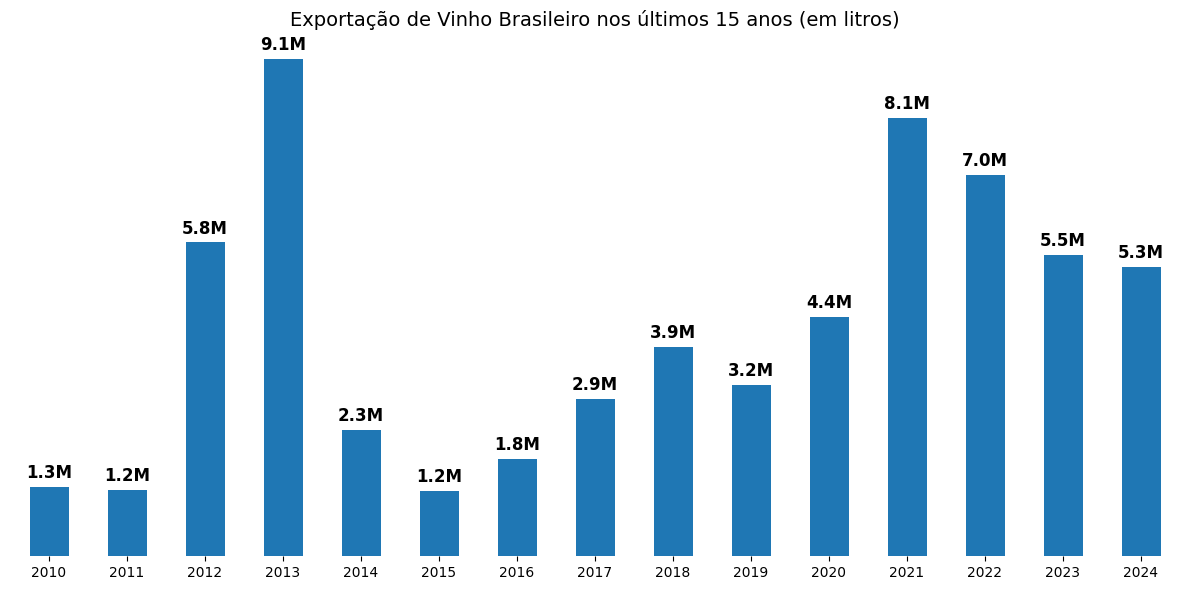

In [ ]:
# Função para formatar em milhões (ex.: "9,2M")
def format_millions(x, pos=None):
    return f'{x/1_000_000:.1f}M'

#  Agrupando os dados de exportação por ano e somando os litros
exportacao_por_ano_litros = exportacao_long.groupby('Ano')['Litros'].sum()

# Criando gráfico de exportação por ano (em litros)
plt.figure(figsize=(12, 6))
ax = exportacao_por_ano_litros.plot(kind='bar', color='#1f77b4')  # cor azul padrão

# Título e rótulo do eixo X (vazio, para não exibir “Ano”)
plt.title('Exportação de Vinho Brasileiro nos últimos 15 anos (em litros)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=0)  # deixar os anos retos, sem rotação

# Removendo linhas de fundo e bordas
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Removendo ticks e labels do eixo Y
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Adicionando os valores formatados (em milhões) no topo de cada barra
max_val = exportacao_por_ano_litros.max()
for i, v in enumerate(exportacao_por_ano_litros):
    ax.text(
        i,
        v + max_val * 0.01,
        format_millions(v),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


Este gráfico mostra a variação do volume total de vinho exportado pelo Brasil entre 2010 e 2024. Observa-se um pico expressivo em 2013, com 9,1 milhões de litros, seguido por uma queda e uma recuperação gradual até outro ápice em 2021 (8,1M). A partir de 2022, há uma leve tendência de queda. Essa oscilação pode indicar influência de fatores externos como crises econômicas, mudanças cambiais ou políticas comerciais ao longo dos anos.

#### **B) Os 5 países que o Brasil mais exportou vinhos em litros (entre 2010-2024):**

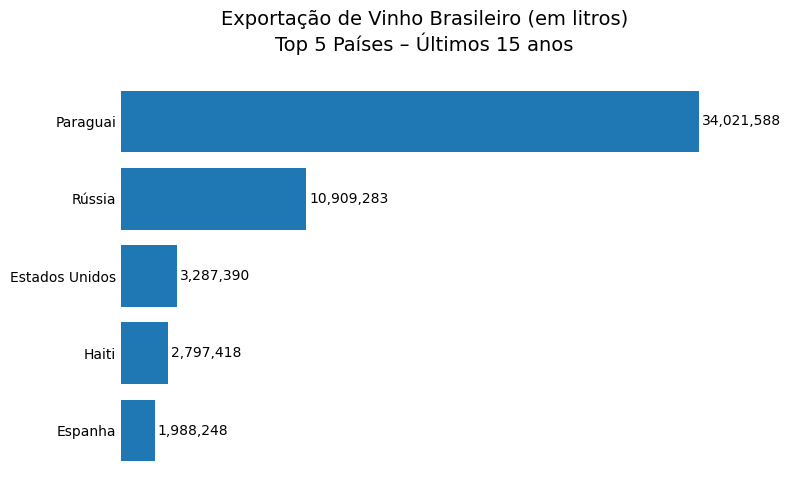

In [ ]:
top5 = (
    exportacao_long
    .groupby('País', as_index=False)['Litros']
    .sum()
    .sort_values('Litros', ascending=False)
    .head(5)
)

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top5['País'], top5['Litros'])
ax.invert_yaxis()


ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(length=0)

max_val = top5['Litros'].max()
for i, v in enumerate(top5['Litros']):
    ax.text(v + max_val * 0.005, i, f"{v:,.0f}", va='center')

ax.set_title(
    'Exportação de Vinho Brasileiro (em litros)\nTop 5 Países – Últimos 15 anos',
    pad=15,
    fontsize=14
)

plt.tight_layout()
plt.show()

O gráfico deixa claro que o Paraguai domina amplamente as exportações brasileiras de vinho, com um volume superior a 34 milhões de litros. Esse valor supera em mais de três vezes o segundo colocado, a Rússia, o que evidencia não apenas uma forte afinidade comercial — possivelmente influenciada pela proximidade geográfica e custos logísticos reduzidos —, mas também um grau elevado de dependência de um único mercado.

Essa concentração comporta riscos significativos. Alterações nas políticas tarifárias, em acordos bilaterais ou mesmo oscilações econômicas locais no Paraguai podem impactar de forma desproporcional as vendas brasileiras. Em contraste, países como Estados Unidos, Haiti e Espanha, ainda que façam parte do top 5, apresentam volumes bastante modestos, o que aponta para uma penetração incipiente além da fronteira do Mercosul.

Para reduzir essa vulnerabilidade e ampliar oportunidades, seria recomendável diversificar os destinos de exportação. Investimentos em promoção de valor agregado — por meio de certificações internacionais, participação em feiras especializadas e comunicação de prêmios conquistados —, além da busca por novas parcerias logísticas, podem ajudar a tornar o vinho brasileiro mais competitivo em mercados mais distantes e sofisticados.

Ademais, vamos analisar a exportação de cada ano (entre 2010-2024) para compreender como cada um desses países acima influenciaram no volume total exportado em cada ano.

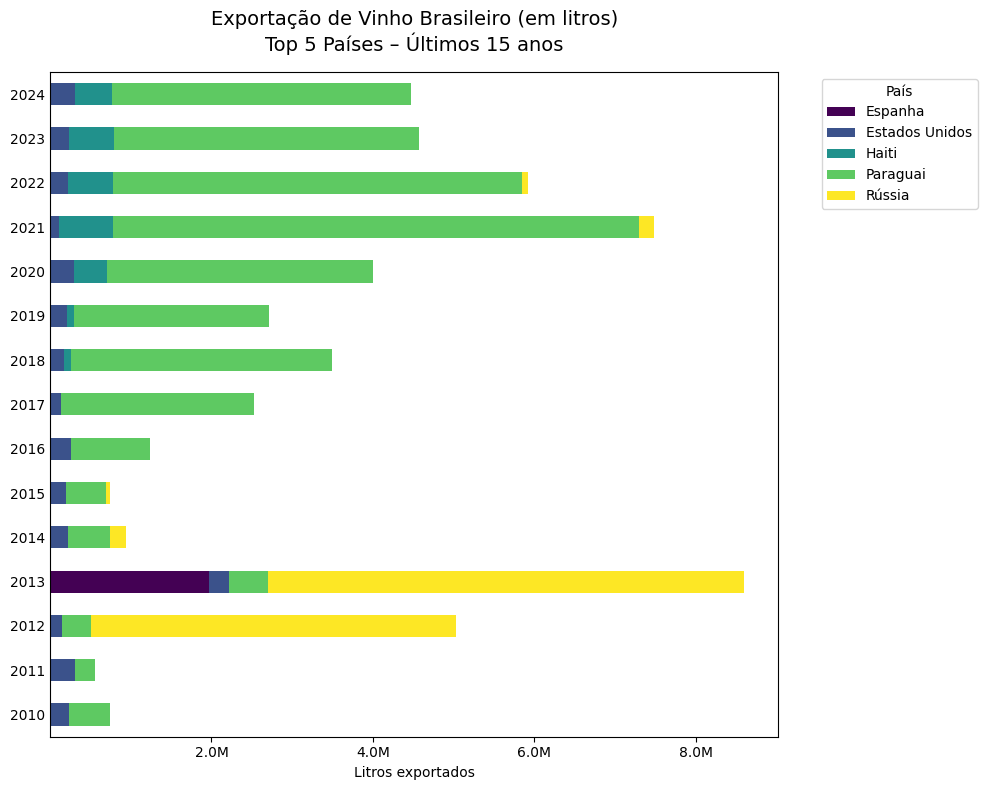

In [ ]:
# Filtrando top 5 países por volume total (litros)
top5_countries = (
    exportacao_long
    .groupby('País', as_index=False)['Litros']
    .sum()
    .sort_values('Litros', ascending=False)
    .head(5)['País']
    .tolist()
)

# Pivot para barras horizontais empilhadas
exportacao_top5 = exportacao_long[exportacao_long['País'].isin(top5_countries)]
exportacao_pivot = (
    exportacao_top5
    .pivot_table(index='Ano', columns='País', values='Litros', aggfunc='sum')
    .fillna(0)
    .sort_index()
)

#  Plot
fig, ax = plt.subplots(figsize=(10, 8))
exportacao_pivot.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='viridis'
)

#  Formatando eixo X em milhões de litros
def fmt_millions(x, pos):
    return f"{x/1e6:.1f}M"
ax.xaxis.set_major_formatter(FuncFormatter(fmt_millions))

#  Título e legenda
ax.set_title(
    "Exportação de Vinho Brasileiro (em litros)\nTop 5 Países – Últimos 15 anos",
    fontsize=14, pad=15
)
ax.set_xlabel("Litros exportados")
ax.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel("")

#  Removendo apenas as linhas verticais de grid
ax.yaxis.grid(False)
ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()


Este gráfico evidencia os cinco países com maior volume total de importação de vinho brasileiro ao longo dos últimos 15 anos. O Paraguai domina com ampla vantagem nos anos mais recentes, consolidando-se como o principal destino do vinho nacional nesse período. A Rússia teve forte participação entre 2012 e 2013, mas deixou de figurar nas exportações nos anos seguintes. A Espanha aparece exclusivamente em 2013, o que sugere uma operação pontual, possivelmente motivada por acordos comerciais ou oportunidades específicas.

Os Estados Unidos mantêm uma presença mais estável, com volumes relativamente baixos, porém consistentes. Já o Haiti, apesar de ter registrado uma pequena importação em 2010, só passou a aparecer com regularidade a partir de 2018, o que pode indicar o início de uma nova relação comercial com o país.


In [ ]:
# Calculando as porcentagens por ano
exportacao_percentual = exportacao_pivot.div(exportacao_pivot.sum(axis=1), axis=0) * 100

# Arredondando para 1 casa decimal
exportacao_percentual_rounded = exportacao_percentual.round(1)

# Formatando como strings com símbolo de porcentagem
exportacao_percentual = exportacao_percentual_rounded.astype(str) + '%'



print(exportacao_percentual)

País Espanha Estados Unidos  Haiti Paraguai Rússia
Ano                                               
2010    0.0%          30.8%   0.4%    68.8%   0.0%
2011    0.9%          55.6%   0.0%    43.5%   0.0%
2012    0.0%           2.9%   0.0%     7.1%  90.0%
2013   23.0%           2.9%   0.0%     5.6%  68.6%
2014    0.0%          23.8%   0.0%    55.8%  20.4%
2015    0.0%          26.5%   0.0%    67.0%   6.4%
2016    0.0%          20.7%   0.0%    79.3%   0.0%
2017    0.0%           5.3%   0.0%    94.7%   0.0%
2018    0.2%           4.8%   2.3%    92.7%   0.0%
2019    0.1%           7.7%   3.0%    89.1%   0.0%
2020    0.0%           7.5%  10.0%    82.5%   0.0%
2021    0.0%           1.5%   9.0%    87.1%   2.4%
2022    0.0%           3.7%   9.4%    85.8%   1.1%
2023    0.0%           5.0%  12.2%    82.7%   0.0%
2024    0.0%           6.9%  10.1%    83.0%   0.0%


A tabela mostra com clareza a participação relativa de cada país ao longo do tempo. Fica evidente o crescimento da dependência do Paraguai, que chega a representar mais de 80% das exportações em diversos anos recentes. Por outro lado, países como Rússia e Espanha tiveram importância pontual, mas perderam relevância. Essa distribuição percentual revela concentração em poucos mercados e pode indicar risco caso ocorram mudanças comerciais ou diplomáticas com o principal parceiro.

#### **C) Receita da Exportação de vinho brasileiro nos últimos 15 anos (em dolar- US\$)**

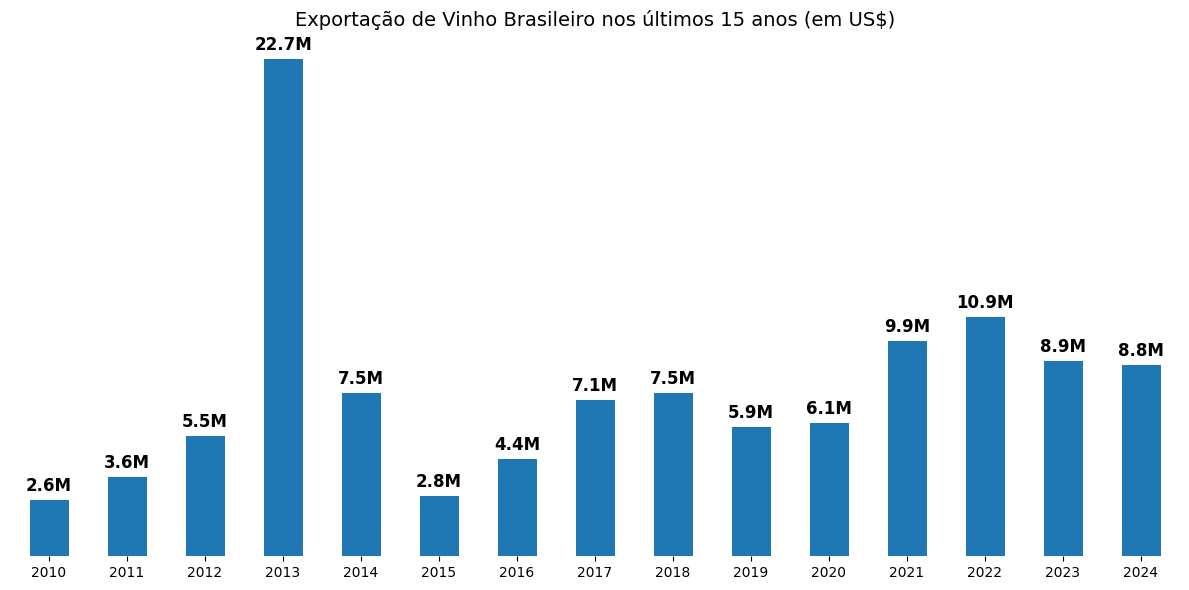

In [ ]:
# Função para formatar em milhões (ex.: "9,2M")
def format_millions(x, pos=None):
    return f'{x/1_000_000:.1f}M'

#  Agrupando os dados de exportação por ano e somando os litros
exportacao_por_ano_dolar = exportacao_long.groupby('Ano')['Valor_USD'].sum()

# Criando gráfico de exportação por ano (em litros)
plt.figure(figsize=(12, 6))
ax = exportacao_por_ano_dolar.plot(kind='bar', color='#1f77b4')

# Título e rótulo do eixo X (vazio, para não exibir “Ano”)
plt.title('Exportação de Vinho Brasileiro nos últimos 15 anos (em US\$)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=0)  # deixar os anos retos, sem rotação

# Removendo linhas de fundo e bordas
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Removendo ticks e labels do eixo Y
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Adicionando os valores formatados (em milhões) no topo de cada barra
max_val = exportacao_por_ano_dolar.max()
for i, v in enumerate(exportacao_por_ano_dolar):
    ax.text(
        i,
        v + max_val * 0.01,
        format_millions(v),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


*O* gráfico de exportação de vinho brasileiro em dólares revela um comportamento marcadamente oscilante ao longo dos últimos 15 anos. O destaque vai para 2013, ano em que o país registrou um pico expressivo de US\$ 22,7 milhões — um valor fora da curva, possivelmente impulsionado por negociações pontuais ou fatores externos favoráveis. Após essa alta, houve uma forte retração, seguida de uma recuperação gradual a partir de 2016, com um novo ápice em 2022( US\$ 10,9M). Nos anos seguintes, observa-se uma leve queda, mas o mercado parece estabilizado em um patamar mais elevado. Comparando com os dados em litros, percebe-se que o valor cresceu mais que o volume, o que sugere uma valorização do vinho brasileiro ou um foco em produtos de maior valor agregado.

#### **D) Os 5 países que o Brasil mais exportou vinhos em US\$ (entre 2010-2024):**

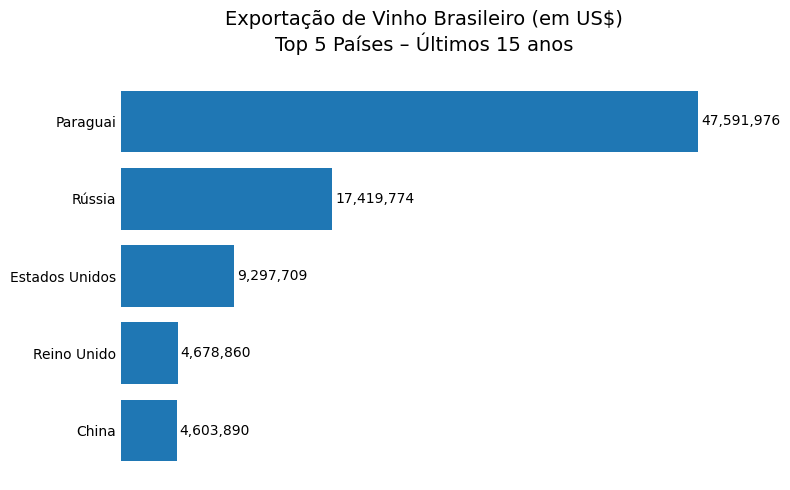

In [ ]:
top5 = (
    exportacao_long
    .groupby('País', as_index=False)['Valor_USD']
    .sum()
    .sort_values('Valor_USD', ascending=False)
    .head(5)
)

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top5['País'], top5['Valor_USD'])
ax.invert_yaxis()


ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(length=0)

max_val = top5['Valor_USD'].max()
for i, v in enumerate(top5['Valor_USD']):
    ax.text(v + max_val * 0.005, i, f"{v:,.0f}", va='center')

ax.set_title(
    'Exportação de Vinho Brasileiro (em US$)\nTop 5 Países – Últimos 15 anos',
    pad=15,
    fontsize=14
)

plt.tight_layout()
plt.show()

O desempenho financeiro das exportações evidencia que o Paraguai segue como protagonista, gerando quase 48 milhões de dólares entre 2010 e 2024. Em segundo lugar, a Rússia soma aproximadamente 17 milhões de dólares, demonstrando um mercado relevante fora do Mercosul.

Já Estados Unidos, Reino Unido e China ficam abaixo de 10 milhões de dólares cada, indicando que esses destinos ainda não alcançaram importância equivalente em termos de receita. Barreiras tarifárias, custos logísticos e o desafio de fortalecer a marca em segmentos premium parecem frear um crescimento mais expressivo nesses países.

Estrategicamente, é fundamental mitigar riscos vinculados à concentração regional — sobretudo no Paraguai — e aproveitar o reconhecimento já existente na Rússia como base para expandir esforços de promoção e certificação. Ao mesmo tempo, iniciativas de branding, storytelling de produto e soluções logísticas devem ser intensificadas para conquistar fatias maiores em mercados de alto potencial e equilibrar a distribuição de receita global.

### **5.2 Quanto à importação:**

#### **A) Volume Total em litros de vinhos importados no Brasil nos últimos 15 anos:**

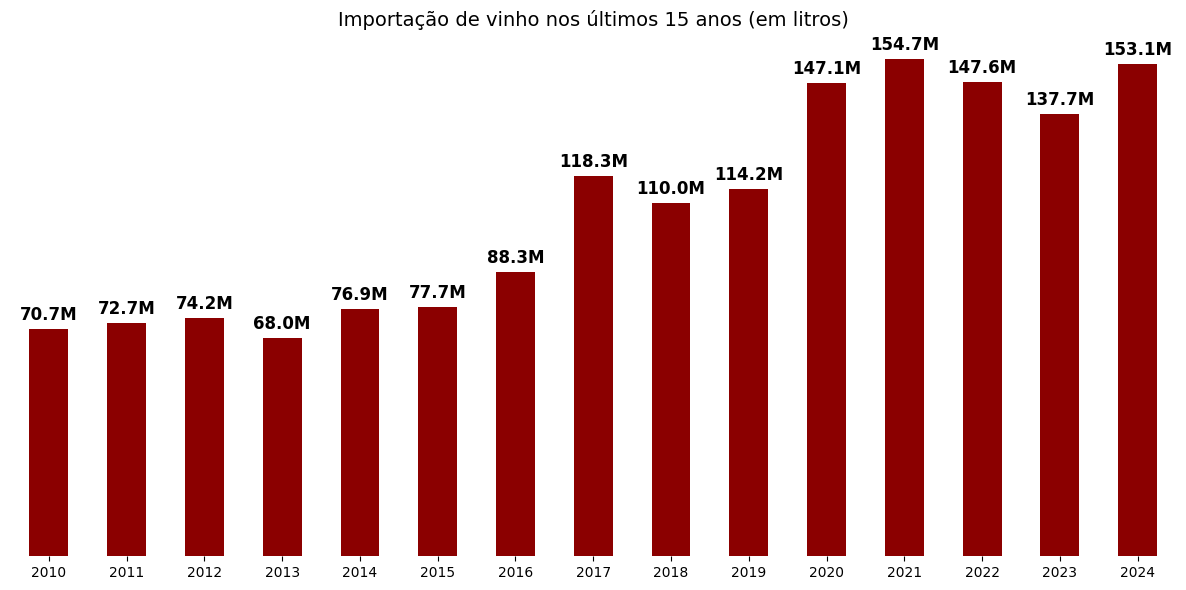

In [ ]:
# Formatando valores em milhões
def format_millions(x):
    return f'{x / 1_000_000:.1f}M'

# Agrupando os dados por ano e somar os litros
importacao_por_ano_litros = importacao.groupby('Ano')['Litros'].sum()

# Criando gráfico de exportação por ano (litros)
plt.figure(figsize=(12, 6))
ax = importacao_por_ano_litros.plot(kind='bar', color='darkred')

# Título e rótulo do eixo X
plt.title('Importação de vinho nos últimos 15 anos (em litros)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=0)

# Removendo linhas de fundo e bordas
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Removendo ticks e labels do eixo Y
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Adicionando os valores formatados no topo das barras
for i, v in enumerate(importacao_por_ano_litros):
    ax.text(i, v + max(importacao_por_ano_litros) * 0.01, format_millions(v),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### **B) Os 5 países que o Brasil mais importou vinhos em litros (entre 2010-2024):**

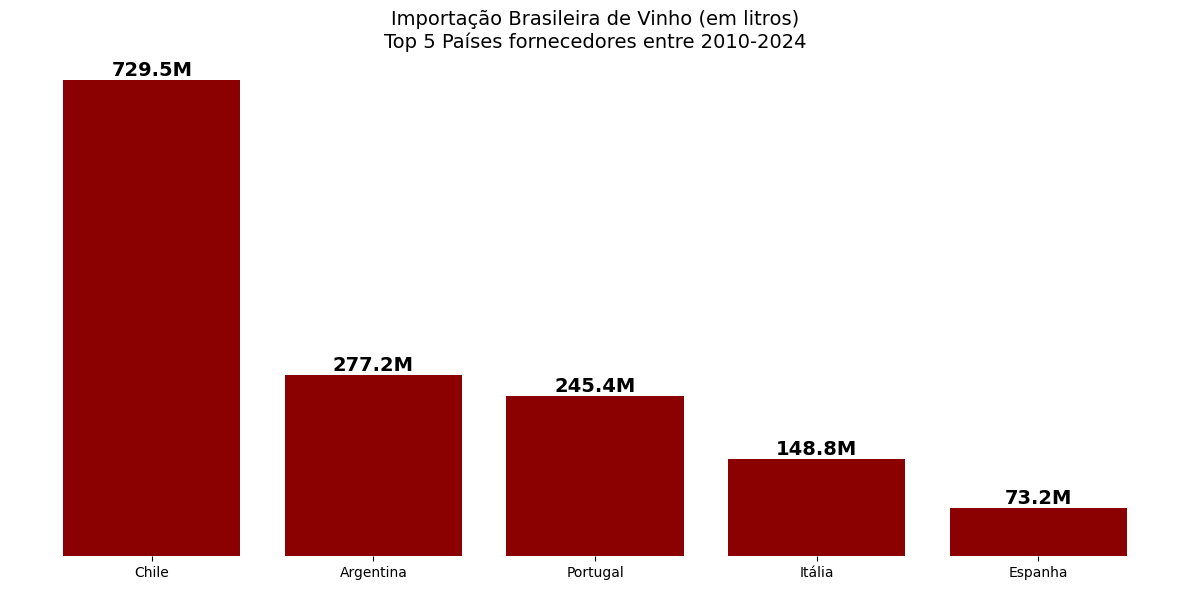

In [ ]:
# Top 5 países por litros importados
litros_por_pais_top5 = importacao.groupby('País')['Litros'].sum().sort_values(ascending=False).head(5)

# Converte valores para milhões e formata (para os rótulos nas barras)
litros_formatados = litros_por_pais_top5.apply(lambda x: f'{x/1_000_000:.1f}M')

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(litros_por_pais_top5.index, litros_por_pais_top5.values, color='darkred')

# Remove linhas de fundo e bordas do gráfico
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove ticks e labels do eixo Y
plt.gca().tick_params(axis='y', which='both', left=False, labelleft=False)

# Adiciona os valores formatados em cima das barras
for bar, label in zip(bars, litros_formatados):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('Importação Brasileira de Vinho (em litros)\nTop 5 Países fornecedores entre 2010-2024', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### **C) Receita da Importação Brasileira de Vinho nos últimos 15 anos (em dolar- US\$):**

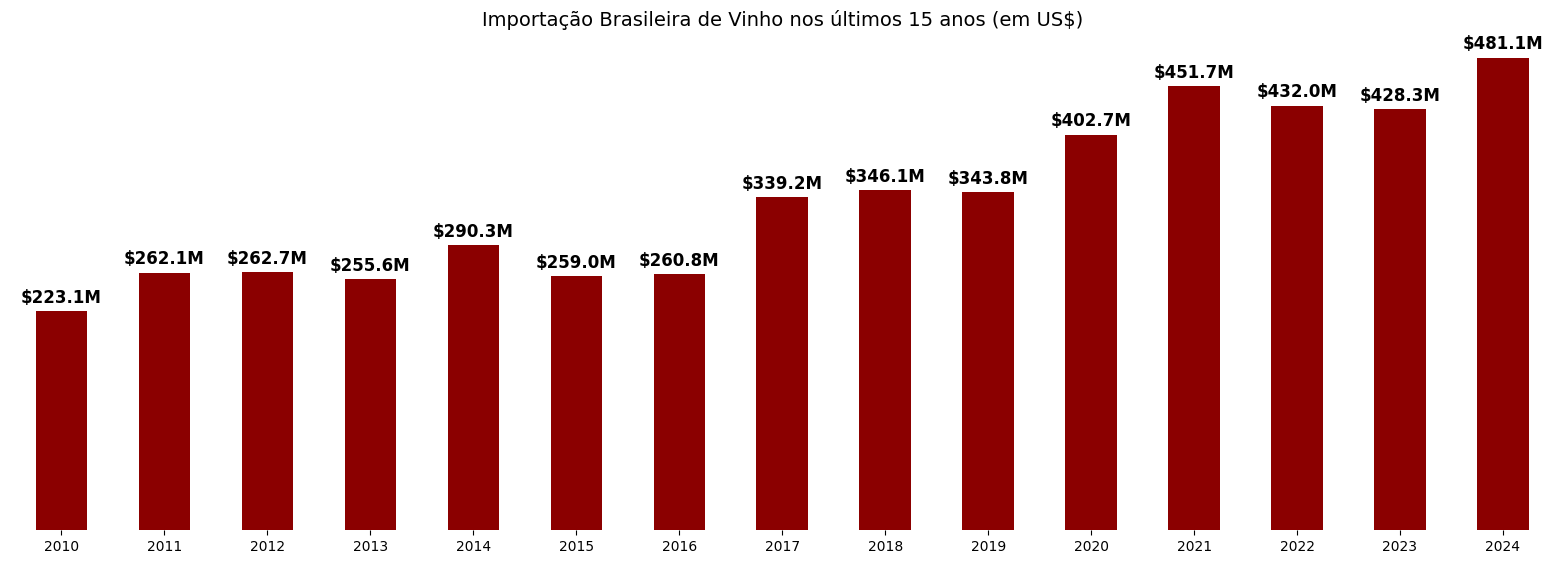

In [ ]:
# Agrupando os dados por ano e somar o valor em USD
importacao_por_ano_usd = importacao.groupby('Ano')['Valor USD'].sum()

# Criando gráfico de importação por ano (valor em US$)
plt.figure(figsize=(16, 6))  # Aumenta a largura do gráfico
ax = importacao_por_ano_usd.plot(kind='bar', color='darkred', width=0.5)

# Título e rótulo do eixo X
plt.title('Importação Brasileira de Vinho nos últimos 15 anos (em US$)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=0)

# Removendo linhas de fundo e bordas
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Removendo ticks e labels do eixo Y
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Adicionando os valores formatados no topo das barras
for i, v in enumerate(importacao_por_ano_usd):
    ax.text(i, v + max(importacao_por_ano_usd) * 0.01, f'${format_millions(v)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout(pad=2)
plt.show()




#### **D) Os 5 países que o Brasil mais importou vinhos em US\$ (entre 2010-2024):**

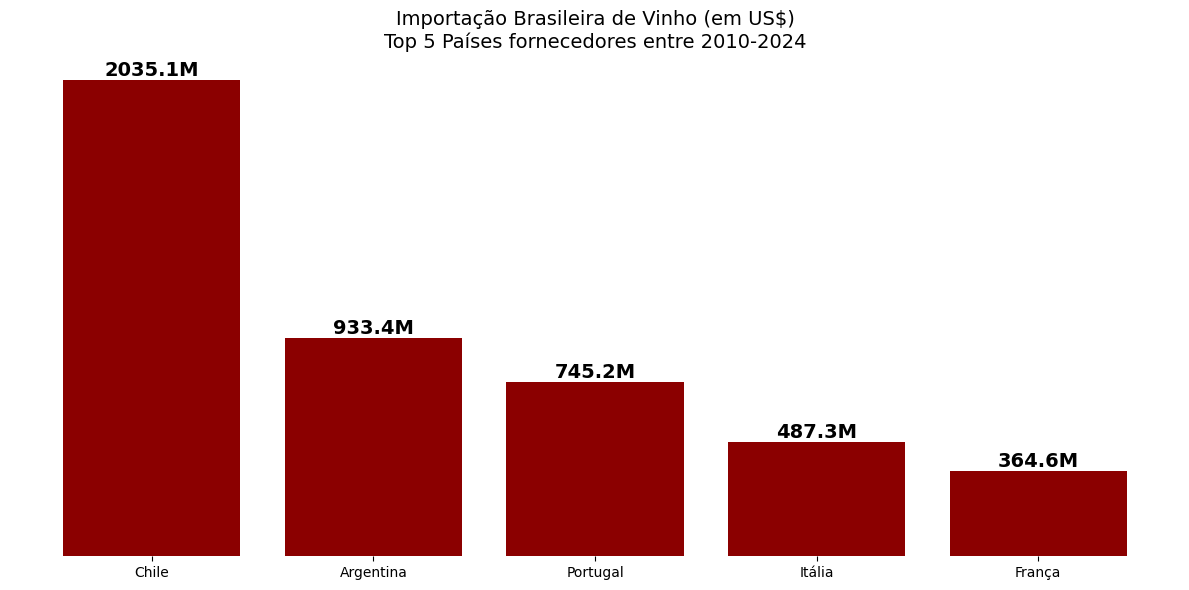

In [ ]:
# Top 5 países por valor importado
valor_por_pais_top5 = importacao.groupby('País')['Valor USD'].sum().sort_values(ascending=False).head(5)

# Converte valores para milhões e formata (para os rótulos nas barras)
valor_formatados = valor_por_pais_top5.apply(lambda x: f'{x/1_000_000:.1f}M')

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(valor_por_pais_top5.index, valor_por_pais_top5.values, color='darkred')

# Remove linhas de fundo e bordas do gráfico
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove ticks e labels do eixo Y (números à esquerda)
plt.gca().tick_params(axis='y', which='both', left=False, labelleft=False)

# Adiciona os valores formatados em cima das barras
for bar, label in zip(bars, valor_formatados):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('Importação Brasileira de Vinho (em US$)\nTop 5 Países fornecedores entre 2010-2024', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


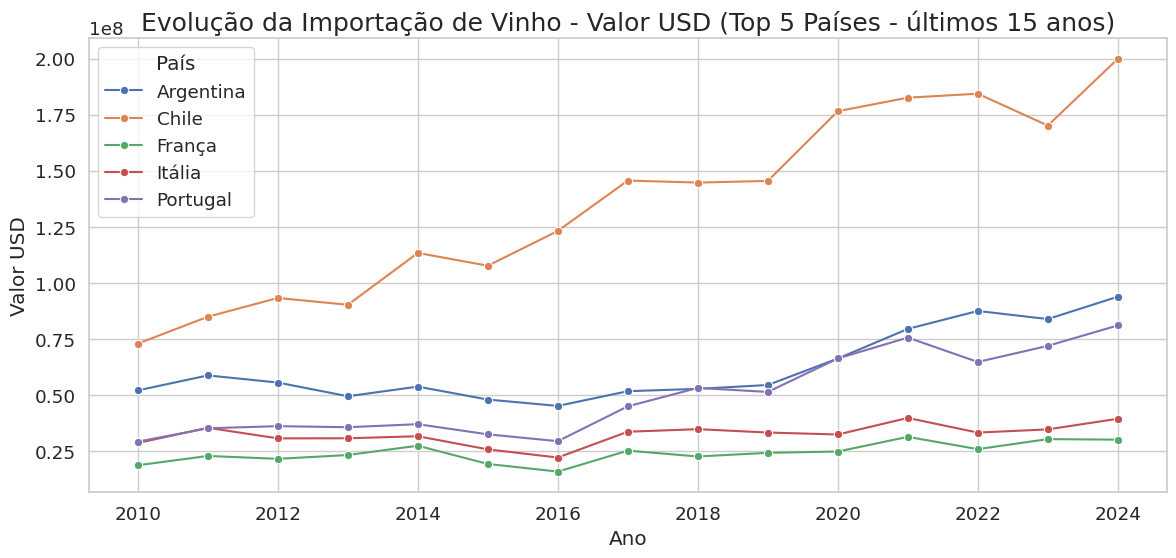

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo geral
sns.set(style="whitegrid", font_scale=1.2)

# 1. Filtrar os últimos 15 anos
ano_atual = importacao['Ano'].max()
anos_recentes = list(range(ano_atual - 14, ano_atual + 1))

df_filtrado = importacao[importacao['Ano'].isin(anos_recentes)]

# 2. Top 5 países com maior valor USD
top5_paises = (
    df_filtrado
    .groupby('País')['Valor USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# 3. Filtrar dados apenas desses países
df_top5 = df_filtrado[df_filtrado['País'].isin(top5_paises)]

# 4. Agrupar por Ano e País
df_agrupado = df_top5.groupby(['Ano', 'País'])[['Valor USD']].sum().reset_index()

# Plotando gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agrupado, x='Ano', y='Valor USD', hue='País', marker='o')

plt.title("Evolução da Importação de Vinho - Valor USD (Top 5 Países - últimos 15 anos)", fontsize=18)
plt.xlabel("Ano")
plt.ylabel("Valor USD")
plt.legend(title="País", loc='upper left')
plt.tight_layout()
plt.show()

**Análise do Aumento das Importações de Vinho no Brasil**

Nos últimos 15 anos, o Brasil, registrou um crescimento expressivo nas importações de vinho. Esse movimento pode ser atribuído a uma série de fatores estruturais e comportamentais que impactaram tanto a oferta quanto a demanda por vinhos no mercado interno.

Do ponto de vista quantitativo, os dados mostram que o valor total das importações de vinho aumentou de US 70,7 milhões em 2010 para US 153,1 milhões em 2024, representando um crescimento de mais de 116% nesse período. Apesar de oscilações pontuais (como queda em 2013 e 2023), a tendência geral é de alta, com saltos significativos nos anos de 2017 (US 118,3M), 2020 (US 147,1M) e 2021 (US 154,7M).

Esses picos coincidem com momentos de transformação no comportamento do consumidor — especialmente durante a pandemia, quando houve um aumento do consumo doméstico de vinhos.

Em termos de origem dos vinhos importados, os cinco principais países fornecedores para o Brasil são Chile, Argentina, Portugal, Itália e França.

O Chile lidera com ampla vantagem, seguido por Argentina e Portugal. Essa predominância pode ser explicada por fatores como proximidade geográfica, acordos comerciais do Mercosul, e a competitividade dos preços dos vinhos desses países. Além disso, tanto Chile quanto Argentina são grandes produtores de vinhos de mesa e vinhos finos, populares entre os consumidores brasileiros.

Além dos fatores já mencionados (como mudança no perfil do consumidor, e-commerce, e promoções comerciais), destaca-se também o crescimento do consumo de vinhos premium — o que justifica o valor expressivo das importações francesas, apesar do volume relativamente menor.

Esses dados evidenciam um amadurecimento do mercado brasileiro de vinhos, tanto em termos de quantidade consumida quanto em diversidade e qualidade dos rótulos procurados. O Rio Grande do Sul, historicamente o maior produtor de vinhos nacionais, também tem se tornado um dos maiores centros consumidores e distribuidores de vinhos importados, favorecido pela logística e pela concentração de importadoras no estado.

### **5.3  Quanto à produção**

In [ ]:
producao.head()

,Categoria,Nome Produto,Ano,Total_Produzido
0,vinho mesa,tinto,2009,164143454
1,vinho mesa,branco,2009,39211278
2,vinho mesa,rosado,2009,2063474
3,vinho fino vinífera,tinto,2009,18209043
4,vinho fino vinífera,branco,2009,21366975


#### **A) Volume total produzido dos principais produtos**

Criando um gráfico para ver a representatividade por categoria de produtos que foram produzios nos últimos 15 anos

<Figure size 1200x700 with 0 Axes>

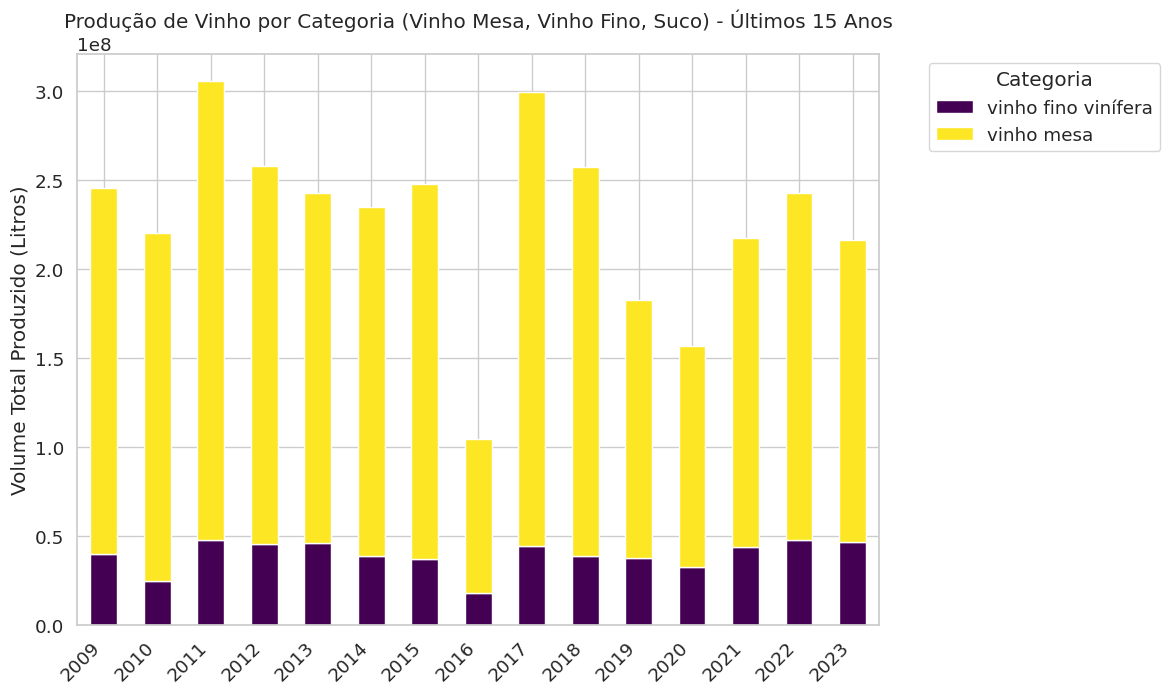

In [ ]:
# Filtro de categorias
# Categorias que desejo incluir no filtro
categorias_desejadas = ['vinho mesa', 'vinho fino vinífera']

# Filtrar o DataFrame 'producao' para incluir apenas as categorias desejadas
producao_filtrada = producao[producao['Categoria'].isin(categorias_desejadas)].copy()

# Agora, usando o DataFrame filtrado para agrupar e pivotar
producao_agrupada = producao_filtrada.groupby(['Ano', 'Categoria'])['Total_Produzido'].sum().reset_index()

# Pivotar os dados
producao_pivotada = producao_agrupada.pivot(index='Ano', columns='Categoria', values='Total_Produzido').fillna(0)

# Ordenar os anos
producao_pivotada = producao_pivotada.sort_index()

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 7))
producao_pivotada.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Produção de Vinho por Categoria (Vinho Mesa, Vinho Fino, Suco) - Últimos 15 Anos')
plt.xlabel('')
plt.ylabel('Volume Total Produzido (Litros)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos observar que nosso produto mais produzido é o vinho de mesa

#### **B) Como o clima afeta a produção de Vinho no Brasil**




A primeira coisa a se considerar é que as videiras são extremamente sensíveis às variações climáticas. O clima, principalmente a temperatura e a quantidade de chuvas, desempenha um papel fundamental no desenvolvimento das uvas. Uma safra quente e seca, por exemplo, pode resultar em uvas mais concentradas e açucaradas, enquanto um clima mais frio e úmido tende a produzir uvas mais ácidas.

Outro aspecto importante é a influência do clima na maturação das uvas. Períodos de sol e calor intenso podem acelerar esse processo, enquanto períodos de chuvas excessivas podem prejudicar a qualidade das uvas. Tudo isso impacta diretamente no sabor e no perfil aromático do vinho.
As estações do ano também exercem uma influência significativa na produção de vinho. A primavera, por exemplo, é crucial para o desenvolvimento das videiras, enquanto o verão é responsável pelo amadurecimento das uvas. O outono, por sua vez, é o momento da colheita, e o inverno é essencial para o descanso das videiras.

Além disso, o clima de cada estação pode determinar o estilo do vinho produzido em determinada região. Vinhos de regiões mais quentes tendem a ser mais encorpados, enquanto vinhos de regiões mais frias costumam ser mais leves e elegantes. O clima influencia não apenas o teor de açúcar das uvas, mas também a acidez, os taninos e a concentração de aromas.

####**C) Como o clima afeta a produção de Vinho no Rio Grande de Sul**

O estado do Rio Grande do Sul é o responsável por mais da metade da produção de uvas de todo o território nacional, sendo, também, o maior produtor de vinhos do país. A uva Merlot é a segunda espécie vinífera tinta com maior área plantada, tendo boa representação em extensão territorial de plantio, bem como em volumes de produção no Rio Grande do Sul. Podemos observar que em 2016 a safra sofreu a maior queda já registrada nos últios anos. A principal causa da quebra histórica foi uma sucessão de fatores climáticos que prejudicaram o desenvolvimento das uvas ao longo do ano, como geadas e excesso de chuvas. Como consequência do prejuízo, o preço de produtos derivados da uva, como vinhos e sucos, sofreu acréscimo.

### **5.4 Quanto à comercialização:**

####**A) Volume total comercializado ao longo de 15 anos em litros:**

Criação de um gráfico dos principais produtos comercializados nos últimos 15 anos.

<Figure size 1200x700 with 0 Axes>

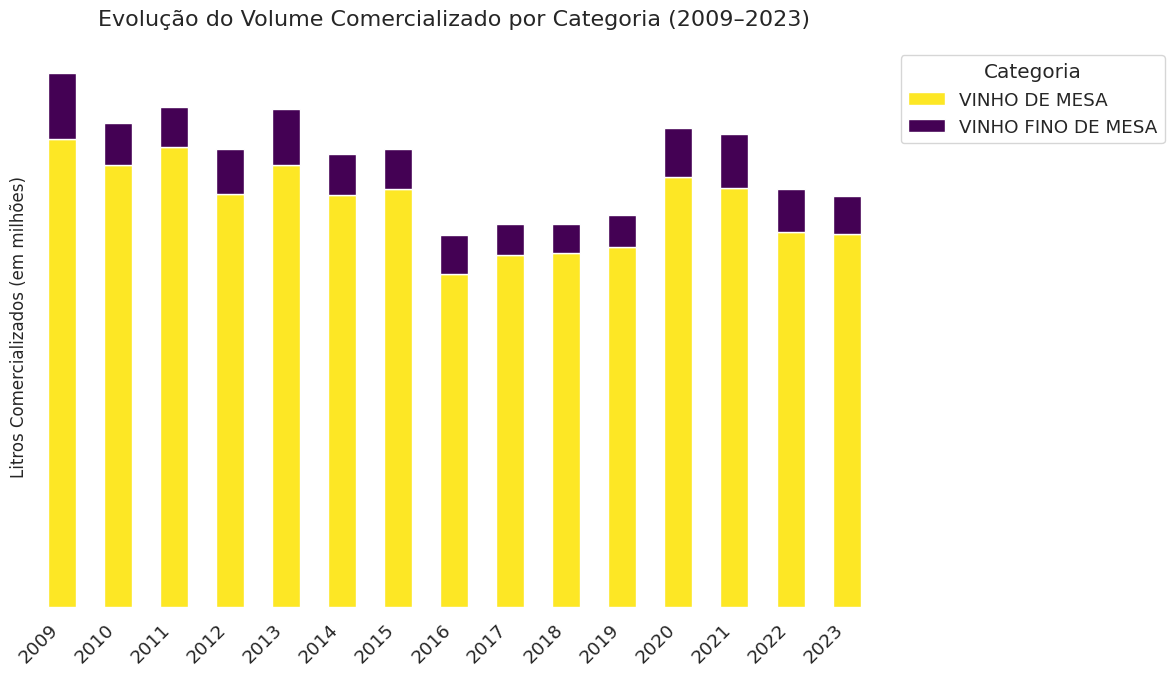

In [ ]:
categorias_desejadas = ['VINHO DE MESA', 'VINHO FINO DE MESA']

comercio_filtrado = (
    comercio_final[
        comercio_final['Categorias'].isin(categorias_desejadas)
    ]
    .copy()
)

anos = [str(y) for y in range(2009, 2024)]

comercio_melted = comercio_filtrado.melt(
    id_vars='Categorias',
    value_vars=anos,
    var_name='Ano',
    value_name='Volume_Comercializado'
)

comercio_melted['Ano'] = comercio_melted['Ano'].astype(int)

comercio_grouped = (
    comercio_melted
    .groupby(['Ano', 'Categorias'])['Volume_Comercializado']
    .sum()
    .reset_index()
)

comercio_pivotada = comercio_grouped.pivot(
    index='Ano',
    columns='Categorias',
    values='Volume_Comercializado'
).fillna(0)

comercio_pivotada = comercio_pivotada.sort_index()
plt.figure(figsize=(12, 7))
ax = comercio_pivotada.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis_r')

def millions_formatter(x, pos):
    return f"{x/1e6:.1f}M"

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.set_title(
    "Evolução do Volume Comercializado por Categoria (2009–2023)",
    fontsize=16,
    pad=15
)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Litros Comercializados (em milhões)", fontsize=12)
ax.set_xticklabels(comercio_pivotada.index, rotation=45, ha="right")
ax.legend(title="Categoria", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="y", which="both", left=False, labelleft=False)

plt.tight_layout()
plt.show()


Percebemos que o vinho fino de mesa concorre bastante com os demais produtos quando falamos de comercialização, mesmo que sua produção seja a maior.Em todos os anos mantemos a basicamente a mesma média de comercialização para cada categoria

#### **Volume Total Comercializado entre 2010-2024:**


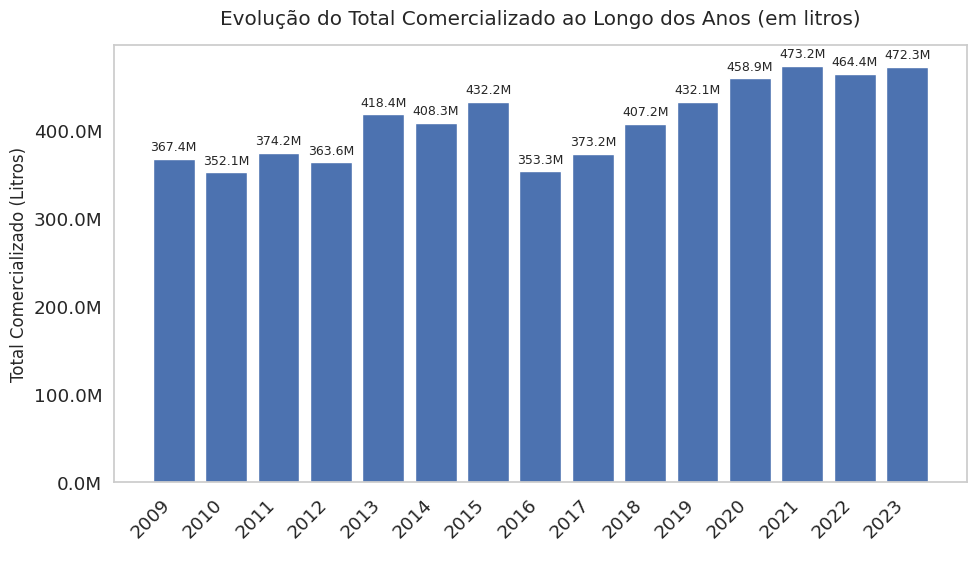

In [ ]:
anos = [str(ano) for ano in range(2009, 2024)]
total_por_ano = comercio_final[anos].sum().reset_index()
total_por_ano.columns = ['Ano', 'Total_Comercializado']
# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(total_por_ano['Ano'], total_por_ano['Total_Comercializado'])

# Formatação do eixo Y em milhões
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Título e rotações
ax.set_title("Evolução do Total Comercializado ao Longo dos Anos (em litros)", pad=15)

# Set X and Y axis labels explicitly
ax.set_xlabel(" ")
ax.set_ylabel("Total Comercializado (Litros)", fontsize=12)

ax.set_xticks(total_por_ano['Ano'])
ax.set_xticklabels(total_por_ano['Ano'], rotation=45, ha='right')

# Desligar toda a grid
ax.grid(False)


for spine in ax.spines.values():
    spine.set_visible(True)

ax.tick_params(axis='y', length=5, labelleft=True)

# Anotar valores acima das barras
max_l = total_por_ano['Total_Comercializado'].max()
for i, v in enumerate(total_por_ano['Total_Comercializado']):
    ax.text(total_por_ano['Ano'][i],
            v + max_l * 0.02,
            millions_formatter(v, None),
            ha='center',
            fontsize=9)

plt.tight_layout()
plt.show()



O mercado de vinhos no Brasil apresentou uma trajetória marcada por oscilações diretamente ligadas a fatores econômicos, climáticos e comportamentais ao longo dos últimos 15 anos. Entre os anos 2014 à 2016, observa-se uma queda acentuada no volume total comercializado, reflexo direto com dois fatores críticos:

1. **Crise Econômica no Brasil:** O PIB caiu 3,8% em 2015 e 3,6% em 2016, o que afetou diversos setores como o econômico, o que inclui o de vinhos, o que diminuiu as vendas de vinhos de mesa e sucos de uva, porém, afetando menos os vinhos finos de mesa, que tiveram casos de crescimento.

2. **Quebra de Safra:** Em 2016 o Brasil sofreu uma quebra de safra de uva significativa, com uma redução de 57% em relação às anteriores. A produção de uva foi estimada em 301,7 milhões de quilos, comparada aos 700 milhões do ano anterior. A principal causa sendo mudanças climáticas como geadas de média e forte intensidade, grandes comprometedoras de produtividade especialmente no Rio Grande do Sul — estado responsável por mais da metade da produção nacional de uvas.

A partir de 2019 há uma recuperação que se intensifica em 2020 e 2021 que ocorre por conta das mudanças de comportamento dos consumidores durante a pandemia da COVID-19. O isolamento social, fortalecimento do e-commerce e fechamento de bares e restaurantes contribuiu para um consumo maior de vinhos no Brasil, Itália e Argentina.

Em 2022 e 2023 o mercado manteve-se em patamares elevados, indicando possível mudança estrutural no hábito do consumo de vinho, contudo, é importante um alerta a respeito de eventos climáticos extremos, como enchentes e alagamentos que contribuem para danos na produção de vinhos na região do Rio Grande do Sul, com estimativas de perdas de até 500 hectares de vinhedos, acarretando a uma quebra de 40% na safra de uvas.


#### **Volume Comercializado por Categoria (em litros):**

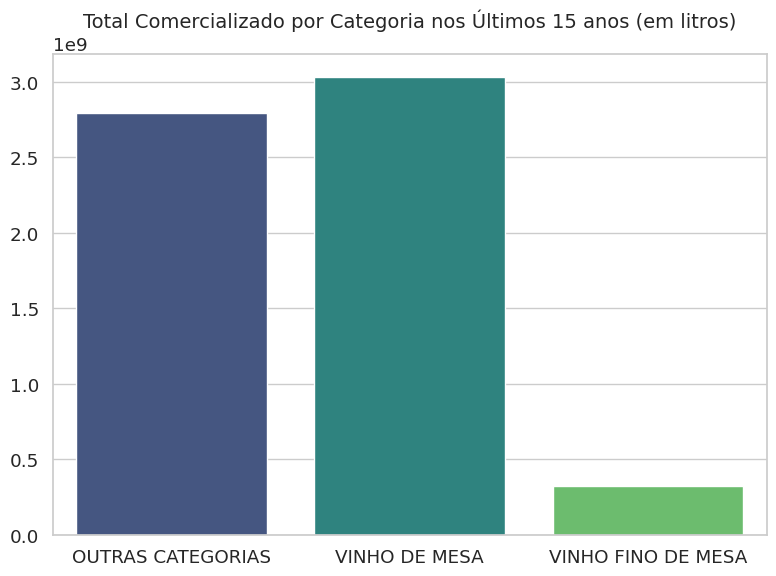

In [ ]:
anos = [str(ano) for ano in range(2009, 2024)]
total_por_categoria = comercio_final.groupby('Categorias')[anos].sum().reset_index()
total_por_categoria['Total_Comercializado'] = total_por_categoria[anos].sum(axis=1)

# Plotar
plt.figure(figsize=(8,6))
# Use as colunas 'Categorias' e 'Total_Comercializado' para o plot
sns.barplot(data=total_por_categoria, x='Categorias', y='Total_Comercializado', palette="viridis")

plt.title('Total Comercializado por Categoria nos Últimos 15 anos (em litros)', fontsize=14)
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

A distribuição do total comercializado no Brasil revela uma predominância do Vinho de Mesa, historicamente liderando o mercado por sua acessibilidade, produção em larga escala e utilização de uvas híbridas e americanas, adaptadas ao clima brasileiro, o que reflete a cultura de consumo e configuração da produção nacional, concentrada no Rio Grande do Sul. O Vinho Fino de Mesa representa uma fatia significativamente menor, relacionado às dificuldades históricas na produção de vinhos de maior qualidade no país, devido a desafios climáticos e alto custo de cultivo de uvas viníferas. A categoria Outros, referentes à espumantes, sucos e derivados também se destaca, impulsionada por um forte crescimento de mercado de espumantes brasileiros, uma referência internacional, e alta demanda de sucos de uva integrais, associados à saúde e bem-estar.

### **5.5 Análise de Participação da Exportação Brasileira no Mercado Global**



In [ ]:
top5_litros = ['Paraguai', 'Rússia', 'Estados Unidos', 'Haiti', 'Espanha']

mercado_pivot['País'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium and Luxemburg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Congo (the Democratic Republic of the)', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea',

In [ ]:
# Dicionário para padronizar nomes dos países conforme a tabela exportacao do Brasil
mapping_mercado = {
    'Paraguay': 'Paraguai',
    'Russia': 'Rússia',
    'United States of America': 'Estados Unidos',
    'Haiti': 'Haiti',
    'Spain': 'Espanha'
}

mercado_pivot['País'] = mercado_pivot['País'].replace(mapping_mercado)


In [ ]:
mercado_pivot.head()

,País,Consumo,Exportação,Importação,Produção
0,Afghanistan,1500000.0,0.0,1200000.0,0.0
1,Albania,322100000.0,0.0,58700000.0,290600000.0
2,Algeria,388300000.0,4500000.0,105400000.0,373400000.0
3,American Samoa,400000.0,0.0,200000.0,0.0
4,Andorra,0.0,0.0,0.0,0.0


In [ ]:
df_top5_mercado = mercado_pivot[mercado_pivot['País'].isin(top5_litros)].copy()
df_top5_mercado

,País,Consumo,Exportação,Importação,Produção
86,Haiti,1.840000e+07,0.000000e+00,2.540000e+07,0.000000e+00
154,Paraguai,3.561000e+08,1.000000e+05,3.125000e+08,2.450000e+07
165,Rússia,1.408200e+10,3.520000e+07,5.975700e+09,7.625500e+09
188,Espanha,1.503070e+10,3.213700e+10,1.105800e+09,5.452530e+10
210,Estados Unidos,4.919380e+10,5.297600e+09,1.762110e+10,3.685780e+10


In [ ]:
top5_exp_litros = (
    exportacao_long
    .groupby('País', as_index=False)['Litros']
    .sum()
    .sort_values('Litros', ascending=False)
    .head(5)
    .rename(columns={'Litros':'Exportação Brasileira(Litros)'})
)

top5_exp_litros= top5_exp_litros.set_index('País')
top5_exp_litros

,Exportação Brasileira(Litros)
País,
Paraguai,34021588
Rússia,10909283
Estados Unidos,3287390
Haiti,2797418
Espanha,1988248


In [ ]:
df_top5_mercado = (
    df_top5_mercado
      .set_index('País')
      .join(top5_exp_litros)
      .reset_index()
)

df_top5_mercado

,País,Consumo,Exportação,Importação,Produção,Exportação Brasileira(Litros)
0,Haiti,1.840000e+07,0.000000e+00,2.540000e+07,0.000000e+00,2797418
1,Paraguai,3.561000e+08,1.000000e+05,3.125000e+08,2.450000e+07,34021588
2,Rússia,1.408200e+10,3.520000e+07,5.975700e+09,7.625500e+09,10909283
3,Espanha,1.503070e+10,3.213700e+10,1.105800e+09,5.452530e+10,1988248
4,Estados Unidos,4.919380e+10,5.297600e+09,1.762110e+10,3.685780e+10,3287390


In [ ]:
df_top5_mercado['Share_Exportacao/Prod_%'] = (
    df_top5_mercado['Exportação Brasileira(Litros)'] / df_top5_mercado['Produção'] * 100.00
).round(2)

df_top5_mercado[['País','Produção','Exportação Brasileira(Litros)','Share_Exportacao/Prod_%']]

,País,Produção,Exportação Brasileira(Litros),Share_Exportacao/Prod_%
0,Haiti,0.000000e+00,2797418,inf
1,Paraguai,2.450000e+07,34021588,138.86
2,Rússia,7.625500e+09,10909283,0.14
3,Espanha,5.452530e+10,1988248,0.00
4,Estados Unidos,3.685780e+10,3287390,0.01


A coluna **`Share_Exportacao/Prod`** representa a fração da produção local de cada país que foi “suprida” pelas exportações brasileiras, ou seja:

- **`inf` em Haiti**  
  A produção reportada pelo OIV é zero, então dividir por zero gera “infinito”. Na prática, isso indica inconsistência (um país sem produção que mesmo assim recebe exportações) e merece tratamento.

- **Paraguai: `138.86%`**  
  O Brasil exportou ~34 milhões de litros para o Paraguai, enquanto o OIV reporta que sua produção no período foi ~24,5 milhões de litros. Ou seja, em teoria, o volume que o Paraguai importou do Brasil é **138,86%** da produção local- o que sugere um possível desalinhamento de séries (diferenças de unidade, anos cobertos ou inconsistência nos dados de produção).

- **Rússia: `0,14%`**  
  Aqui o Brasil exportou cerca de 10,9 milhões de litros para a Rússia, que produz 7 625 500 000 L (7,6 bilhões L). Assim, as exportações brasileiras representam apenas 0,14% da produção russa.

- **Espanha: `0,00%`**  
Cerca de 1,99 milhões de litros exportados pelo Brasil versus 54 525 300 000 L produzidos na Espanha no mesmo período — cerca de 0,004% da produção espanhola.

- **Estados Unidos: `0,01%`**  
  Exportação de ~3,29 milhões de litros contra produção de ~36,9 bi L → ~**0,009%** da produção americana.


A análise revela que as exportações brasileiras de vinho estão fortemente concentradas em poucos mercados, sendo o Paraguai o principal destino. Curiosamente, o volume exportado pelo Brasil para o Paraguai equivale a 138 % da produção local desse país, o que indica uma dependência extrema: qualquer mudança nas condições comerciais ou nas políticas fronteiriças pode afetar abruptamente nossos embarques. Em contrapartida, Rússia, Espanha e Estados Unidos apresentam participação do vinho brasileiro abaixo de 0,1 % de sua produção interna. Esse baixo “share” sugere uma janela de oportunidade para crescimento, pois ainda há pouca concorrência local. Estratégias de trade marketing e posicionamento de produtos premium nesses mercados podem contribuir para aumentar nossa fatia e o preço médio por litro.

Esse cenário também destaca um risco de sobredependência: concentrar grande parte das vendas em um único mercado deixa o setor vulnerável a choques regionais. Para mitigar esse risco, é recomendável diversificar os destinos, explorando mercados onde hoje nossa participação é pequena.Por fim, a baixa penetração em mercados de alto poder aquisitivo, como EUA e Rússia, aponta para a importância de focar em valor agregado. Fortalecer acordos comerciais e trabalhar linhas premium pode elevar a receita e reduzir a sensibilidade a flutuações de volume.

In [ ]:
df_top5_mercado['Share Exp/Imp (%)'] = (
    df_top5_mercado['Exportação Brasileira(Litros)']
    / df_top5_mercado['Importação']
    * 100
).round(2)
df_top5_mercado[['País', 'Importação', 'Exportação Brasileira(Litros)', 'Share Exp/Imp (%)']]

,País,Importação,Exportação Brasileira(Litros),Share Exp/Imp (%)
0,Haiti,2.540000e+07,2797418,11.01
1,Paraguai,3.125000e+08,34021588,10.89
2,Rússia,5.975700e+09,10909283,0.18
3,Espanha,1.105800e+09,1988248,0.18
4,Estados Unidos,1.762110e+10,3287390,0.02


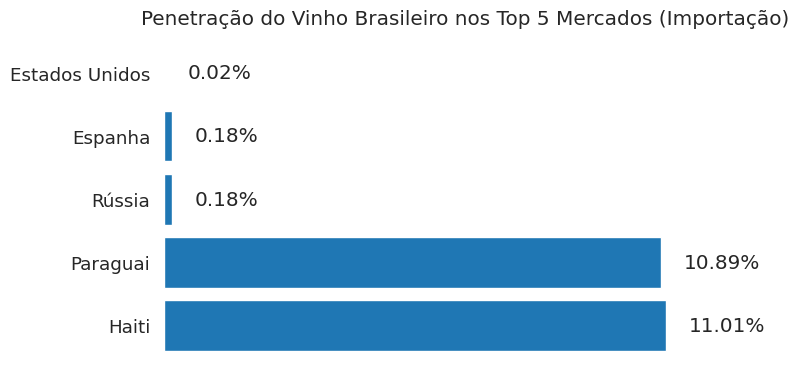

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(
    df_top5_mercado['País'],
    df_top5_mercado['Share Exp/Imp (%)'],
    color='#1f77b4'
)

# Remove toda a grid
ax.grid(False)

# Remove os spines (contornos)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.set_visible(False)

# Anotações
for i, v in enumerate(df_top5_mercado['Share Exp/Imp (%)']):
    ax.text(v + 0.5, i, f"{v:.2f}%", va='center')

# Formatação
ax.set_title('Penetração do Vinho Brasileiro nos Top 5 Mercados (Importação)')
ax.set_xlim(0, df_top5_mercado['Share Exp/Imp (%)'].max() * 1.2)

plt.tight_layout()
plt.show()


In [ ]:
# Ordenar do maior para o menor pela coluna Importação
mercado_ordenado = mercado_pivot.sort_values(by='Importação', ascending=False)

# Selecionar os top 10 que mais importaram
top10_importacao = mercado_ordenado.head(11).iloc[1:]
top10_importacao

,País,Consumo,Exportação,Importação,Produção
75,Germany,2.963390e+10,5.587800e+09,2.212620e+10,1.285780e+10
209,United Kingdom,1.943480e+10,1.136200e+09,1.993080e+10,8.990000e+07
210,Estados Unidos,4.919380e+10,5.297600e+09,1.762110e+10,3.685780e+10
69,France,3.939730e+10,2.111320e+10,9.743100e+09,6.599990e+10
155,People's Republic of China,2.196550e+10,6.050000e+07,6.775900e+09,1.479890e+10
139,Netherlands,5.227200e+09,9.612000e+08,6.171300e+09,9.800000e+06
165,Rússia,1.408200e+10,3.520000e+07,5.975700e+09,7.625500e+09
35,Canada,7.401500e+09,1.658400e+09,5.968500e+09,9.644000e+08
18,Belgium,3.849700e+09,9.367000e+08,4.692300e+09,2.050000e+07
98,Japan,4.918300e+09,3.400000e+06,3.799100e+09,1.152100e+09


In [ ]:
# Ordenar do maior para o menor pela coluna Consumo
mercado_ordenado = mercado_pivot.sort_values(by='Consumo', ascending=False)

# Selecionar os top 10 que mais consumem vinho
top10_consumo = mercado_ordenado.head(11).iloc[1:]
top10_consumo

,País,Consumo,Exportação,Importação,Produção
210,Estados Unidos,4.919380e+10,5.297600e+09,1.762110e+10,3.685780e+10
69,France,3.939730e+10,2.111320e+10,9.743100e+09,6.599990e+10
96,Italy,3.341340e+10,3.170560e+10,3.388700e+09,7.124000e+10
75,Germany,2.963390e+10,5.587800e+09,2.212620e+10,1.285780e+10
155,People's Republic of China,2.196550e+10,6.050000e+07,6.775900e+09,1.479890e+10
209,United Kingdom,1.943480e+10,1.136200e+09,1.993080e+10,8.990000e+07
188,Espanha,1.503070e+10,3.213700e+10,1.105800e+09,5.452530e+10
165,Rússia,1.408200e+10,3.520000e+07,5.975700e+09,7.625500e+09
7,Argentina,1.369440e+10,4.266500e+09,1.336000e+08,1.902640e+10
10,Australia,8.205000e+09,1.081110e+10,1.343300e+09,1.810260e+10


Os três rankings — de importação total, de consumo total e de penetração do Brasil nesses mercados — revelam nuances importantes sobre onde o vinho brasileiro já tem presença e onde há espaço para crescer. Primeiro, vemos que grandes consumidores nem sempre são grandes importadores: Itália e Espanha, por exemplo, figuram entre os maiores bebedores de vinho, mas mantêm produção interna tão robusta que aparecem fora do Top 10 de importação. Por outro lado, Estados Unidos e França estão no topo de ambos os rankings, confirmando sua dependência de vinhos estrangeiros para suprir a demanda.

Além disso,há uma grande assimetria na penetração do vinho brasileiro entre os cinco principais mercados. Haiti e Paraguai apresentam níveis elevados de dependência das exportações brasileiras, com cerca de 11 % de tudo o que consomem vindo do Brasil. Isso sugere que já existe um canal de distribuição bem estabelecido nesses destinos, o que é positivo, mas ao mesmo tempo acende um sinal de alerta para o risco de **overselling**: qualquer interrupção logística, alteração regulatória ou instabilidade política nesses mercados pode afetar drasticamente nossos volumes exportados.

Em contraste, Rússia e Espanha representam mercados maduros e de grande valor, mas nos quais o Brasil participa com menos de 0,2 % das importações locais. Esse percentual baixo indica um amplo espaço de crescimento, embora também reflita a forte concorrência de fornecedores tradicionais (França, Itália, Chile etc.). Para ganhar terreno nesses países, será necessário investir em estratégias de diferenciação — como o desenvolvimento de linhas premium, certificações de origem ou campanhas de marketing focadas em atributos únicos do vinho brasileiro.

O caso dos Estados Unidos é ainda mais emblemático: com apenas 0,02 % de penetração, o Brasil hoje exerce influência quase nula no maior consumidor de vinho do mundo( sendo também um dos países que mais importam no mundo). Por outro lado, esse patamar inicia um enorme potencial de expansão. Com parcerias de distribuição, adaptação de portfólio aos gostos locais e investimentos em trade marketing, é possível conquistar fatias de mercado substanciais, mesmo partindo de um valor inicial muito pequeno.

Em termos estratégicos, a lição central é equilibrar o portfólio de destinos. Devemos mitigar riscos de sobredependência em mercados pequenos — garantindo contratos mais flexíveis e evitando overselling em canais saturados — ao mesmo tempo em que abrimos caminho em mercados grandes, mas de baixa penetração, através de iniciativas de valor agregado e inteligência comercial aprimorada. Por fim, vale reforçar a importância de revisar a consistência dos dados de produção e importação para assegurar que as decisões se baseiem em informações precisas e comparáveis em termos de período e unidade de medida.
